<a href="https://colab.research.google.com/github/estebanhernandezr/DNA-compression/blob/main/Copia_de_Vowels_Classifier_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Imports and GitHub**

In [1]:
!pip install pydub

In [81]:
from keras.datasets import mnist
import numpy as np
import os
from google.colab import drive
import sys
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
from pydub import AudioSegment
import wave
import traceback
from logging import exception
from scipy.signal import welch

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Importación de los datos**

Para empezar, debemos cargar la base de datos desde *google drive*. Para esto, utilizamos el modulo **drive**. Una vez realizada la interfaz desde *colab*, navegamos entre las carpetas hasta la ruta: ***content/drive/My Drive/Proyecto Clasificación de Vocales)***.

In [4]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


A continuación, accedemos al contenido de la ruta. Nos percatamos de que en ella existen tres carpetas: **A**, **E**, **I**, **O** Y **U**, cada una de las cuales contiene una colección de notas de voz de *Whatsapp* (archivos **.ogg**) convertidos a archivos **.wav**. Estos archivos corresponden a una muestra aleatoria tomada por los estudiantes del curso de *Aprendizaje Automático de Máquina*, compuesta en su mayoría por voces de jovenes adultos (compañeros de **MACC**).

In [5]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales"

A  convert.ipynb  E  I	O  U  Untitled0.ipynb


Antes de continuar, por si acaso, reescribimos los archivos en una **ruta local** como archivos con extensión **.wav**. Para esto utilizamos el módulo *pydub*.

In [6]:
path = "/content/drive/My Drive/Proyecto Clasificación de Vocales/"
route = "WAVs/"
os.mkdir(route)
vocales = ['A', 'E', 'I', 'O', 'U']
for vocal in vocales:
     os.mkdir(route+vocal)
     for audio in os.listdir(path+vocal):
         audio_seg = AudioSegment.from_ogg(path+vocal+'/'+audio)
         wav_file = audio_seg.export(route+vocal+'/'+audio, format="wav")
         #open(route+vocal+'/'+audio, 'w')
         #wave.open(route+vocal+'/'+audio,'wb')

Accediendo al contenido de la carpeta **A**

In [7]:
#path_A = '/content/drive/My Drive/Proyecto Clasificación de Vocales/A'
path_A = '/content/WAVs/A'
dir_path_A = os.path.dirname(os.path.realpath(path_A))
A_records = []
for root, dirs, files in os.walk(dir_path_A):
    for record in files:
        if record.startswith('A') and record.endswith('.wav'):
            A_records.append(record)

Accediendo al contenido de la carpeta **E**

In [8]:
#path_E = '/content/drive/My Drive/Proyecto Clasificación de Vocales/E'
path_E = '/content/WAVs/E'
dir_path_E = os.path.dirname(os.path.realpath(path_E))
E_records = []
for root, dirs, files in os.walk(dir_path_E):
    for record in files:
        if record.startswith('E') and record.endswith('.wav'):
            E_records.append(record)

Accediendo al contenido de la carpeta **I**

In [9]:
#path_I = '/content/drive/My Drive/Proyecto Clasificación de Vocales/I'
path_I = '/content/WAVs/I'
dir_path_I = os.path.dirname(os.path.realpath(path_I))
I_records = []
for root, dirs, files in os.walk(dir_path_I):
    for record in files:
        if record.startswith('I') and record.endswith('.wav'):
            I_records.append(record)

Accediendo al contenido de la carpeta **O**

In [10]:
#path_O = '/content/drive/My Drive/Proyecto Clasificación de Vocales/O'
path_O = '/content/WAVs/O'
dir_path_O = os.path.dirname(os.path.realpath(path_O))
O_records = []
for root, dirs, files in os.walk(dir_path_O):
    for record in files:
        if record.startswith('O') and record.endswith('.wav'):
            O_records.append(record)

Accediendo al contenido de la carpeta **U**

In [11]:
#path_U = '/content/drive/My Drive/Proyecto Clasificación de Vocales/U'
path_U = '/content/WAVs/U'
dir_path_U = os.path.dirname(os.path.realpath(path_U))
U_records = []
for root, dirs, files in os.walk(dir_path_U):
    for record in files:
        if record.startswith('U') and record.endswith('.wav'):
            U_records.append(record)

#**Visualización de los datos**

A continuación imprimimos los archivos de la ruta, separados por clases en diferentes vectores y sus respectivas longitudes. Deberiamos ser capaces de ver únicamente archivos con extensión **.wav**. Para empezar, notaremos que existen al rededor de 100 archivos por cada vocal: la manera en la que se construyo la muestra; a cada persona se le pidio pronunciar las 5 vocales, ayuda a garantizar una cantidad similar para todos las vocales.

Con todo lo que hemos hecho hasta ahora ya podemos acceder las notas de voz. Así que, ya podemos comenzar a visualizar los datos importados.

Es importante tener en cuenta que los archivos con los que estamos trabajando son archivos **.wav**, en ese orden de ideas, conviene tener claro qué tipo de información un archivo **.wav** es capaz de proveer acerca de la señal.

In [ ]:
def visualize_wav_meta(path, wav_file):
    samplerate, data = wavfile.read(path+'/'+wav_file)
    if (isinstance(data[0], np.ndarray)):
        print(f"number of frames = {data.shape[0]}")
        print(f"number of channels = {data.shape[1]}")
    else:
        print(f"number of frames = {len(data)}")
        print(f"number of channels = {1}")

def visualize_wav_wave(path, wav_file):
    samplerate, data = wavfile.read(path+'/'+wav_file)
    if (isinstance(data[0], np.ndarray)):
        length = data.shape[0] / samplerate    
        time = np.linspace(0., length, data.shape[0])
        plt.plot(time, data[:, 0], label="Left channel")
        plt.plot(time, data[:, 1], label="Right channel")
        plt.legend()
        plt.title(wav_file)
        plt.xlabel("Time [seg]")
        plt.ylabel("Amplitude")
        plt.show()
        plt.psd(data[:, 1], samplerate)
        plt.show()
    else:
        length = len(data) / samplerate
        time = np.linspace(0., length, len(data))
        plt.plot(time, data, label="Only channel")
        plt.legend()
        plt.title(wav_file)
        plt.xlabel("Time [seg]")
        plt.ylabel("Amplitude")
        plt.show()
        plt.psd(data, samplerate)
        plt.show()
    print("Duración: ", length)

def visualize_wav_info(path, wav_file):
    try:
        visualize_wav_meta(path, wav_file)
        visualize_wav_wave(path, wav_file)
    except Exception as e:
        print(e)

A continuación visualizamos alguna de la información que es posible extraer de los archivos **.wav** con python: características descriptivas de los archivos y una gráfica de la onda de sonido. Además de esto último, también graficamos el espectro *PSD* (*Power Spectral Density*) en función de la *frecuencia* de la señal. Para generar ambas gráficas utilizamos los modulos **scipy** y **matplotlib**. Mientras que, para obtener la información utilizamos el modulo **scipy.wavfile**, especificamente, la función **read**.

Visualizamos la información para cada una de las muestras de las clases **A**, **E**, **I**, **O** y **U**.

In [ ]:
for a in A_records:
    visualize_wav_info(path_A, a)

Podemos notar algunas cosas que son importantes tener en cuenta:


1.   Algunas muestras de sonido corresponden a un **sonido estereo**, es decir, son una sucesión de valores para un altavoz izquierdo, y otro derecho. Pero, en realidad, solamente los registros del altavoz izquierdo son significativos, pues en el estereograma del canal derecho parece no existir. Esto puede detectarse facilmente en la información del archivo por medio de **shape**, ya que los sonidos estereos se caracterizan por **shape = (x, 2)**, mientras que los **mono auditivos** se caracterizan por **shape = (x,   )**. Esto también puede deducirse facilmente de los colores de las gráficas: cuando se trata de un **sonido estereo** hay dos curvas (azul y naranja), cuando no, solo una (azul).

2.   Las señales de sonido **no** están normalizadas.

3.   Visualmente, las señales de diferentes clases pueden parecerse mucho entre sí.

4.   No existe la misma cantidad de sonidos **estereo** que de sonidos **mono auditivos**.





In [ ]:
def visualize_all_wave(path, wav_file):
    samplerate, data = wavfile.read(path+'/'+wav_file)
    if (isinstance(data[0], np.ndarray)):
        length = data.shape[0] / samplerate    
        time = np.linspace(0., length, data.shape[0])
        """plt.plot(time, data[:, 0], label="Left channel")
        plt.plot(time, data[:, 1], label="Right channel")
        plt.legend()
        plt.title(wav_file)
        plt.xlabel("Time [seg]")
        plt.ylabel("Amplitude")
        plt.show()"""
        plt.psd(data[:, 1], 2**5, scale_by_freq=True)
        #plt.show()
    else:
        length = len(data) / samplerate
        time = np.linspace(0., length, len(data))
        """plt.plot(time, data, label="Only channel")
        plt.legend()
        plt.title(wav_file)
        plt.xlabel("Time [seg]")
        plt.ylabel("Amplitude")
        plt.show()"""
        plt.psd(data, 2**5, scale_by_freq=True)
        #plt.show()
    print("Duración: ", length)

def visualize_all_psd(path, wav_file):
    try:
        #visualize_wav_meta(path, wav_file)
        visualize_wav_wave(path, wav_file)
    except Exception as e:
        print(e)

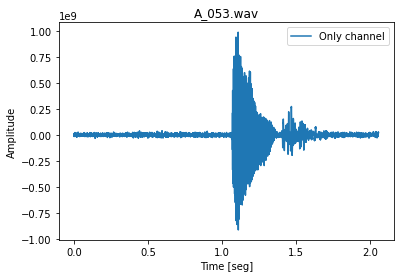

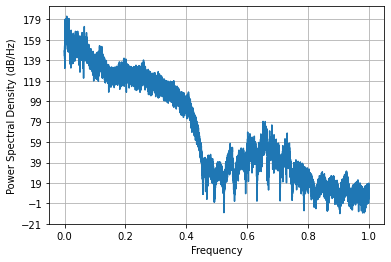

Duración:  2.0535


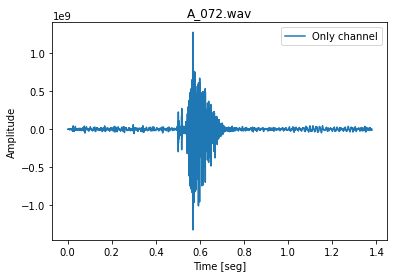

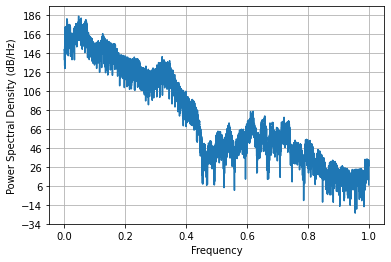

Duración:  1.38


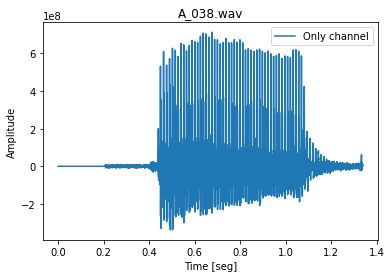

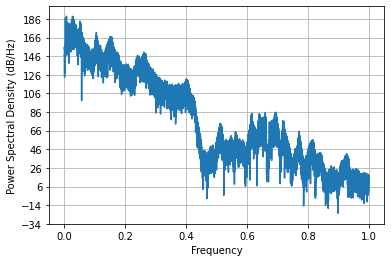

Duración:  1.3378333333333334


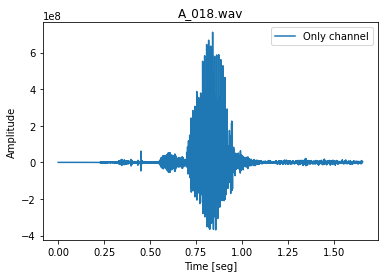

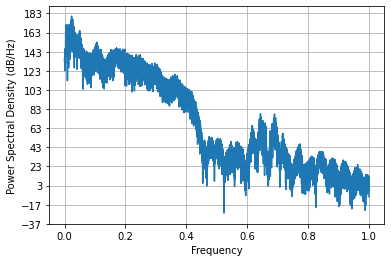

Duración:  1.6578333333333333


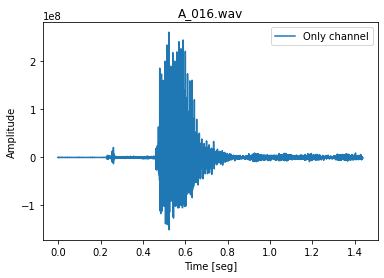

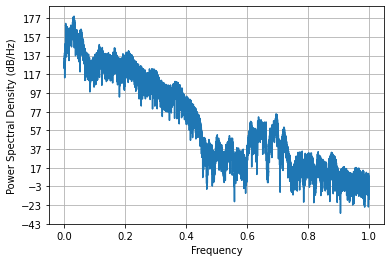

Duración:  1.4378333333333333


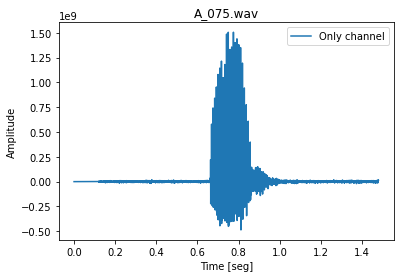

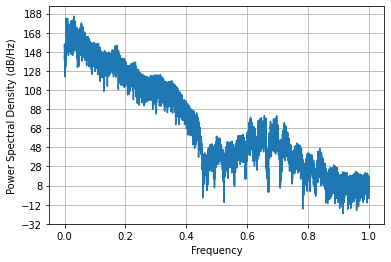

Duración:  1.48


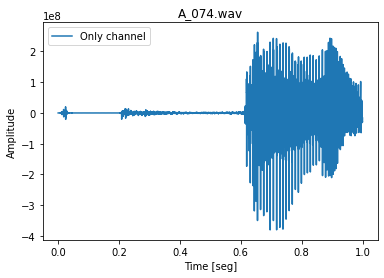

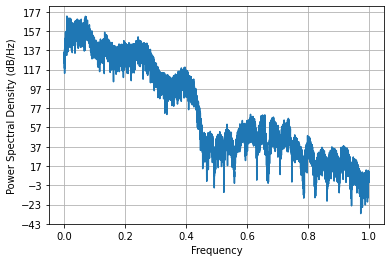

Duración:  1.0


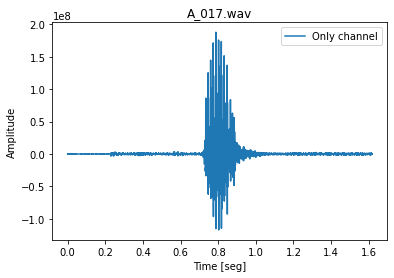

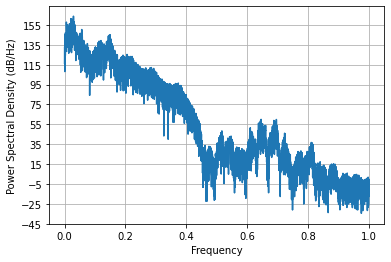

Duración:  1.6178333333333332


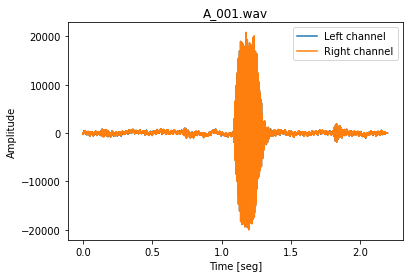

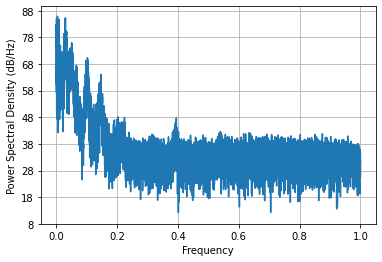

Duración:  2.1953125


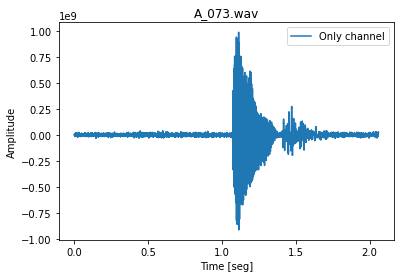

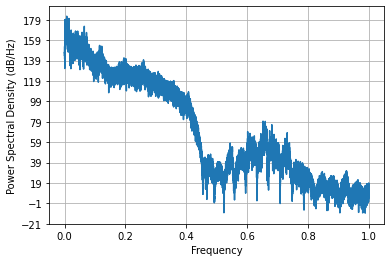

Duración:  2.06


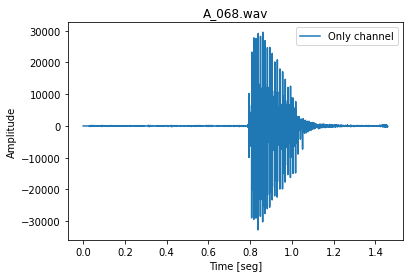

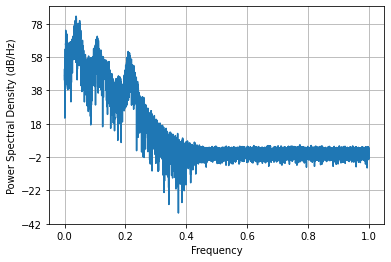

Duración:  1.4578333333333333


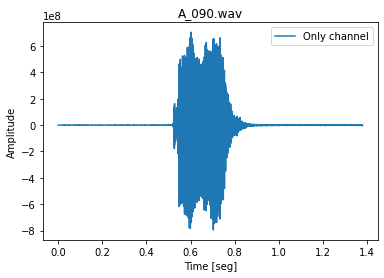

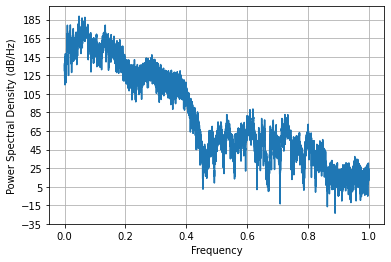

Duración:  1.38


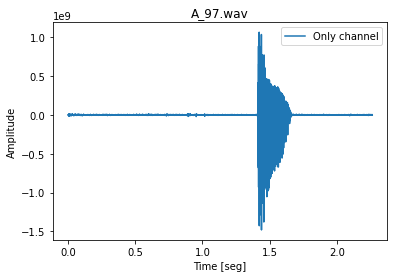

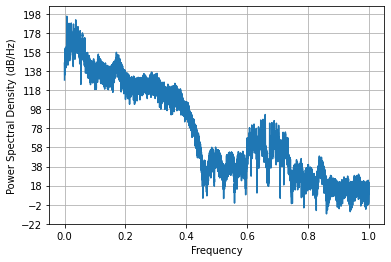

Duración:  2.26


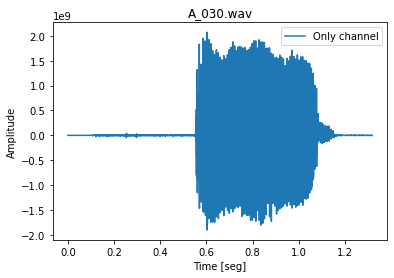

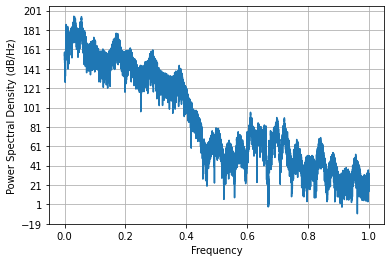

Duración:  1.3178333333333334


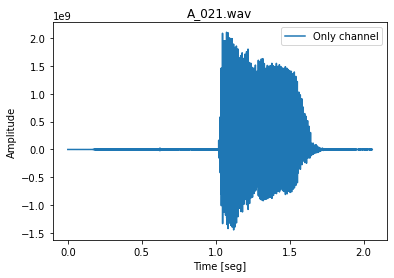

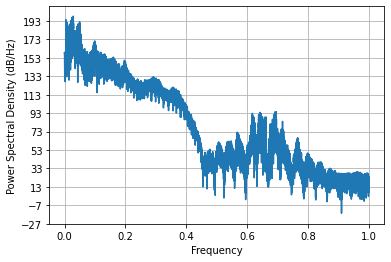

Duración:  2.0578333333333334


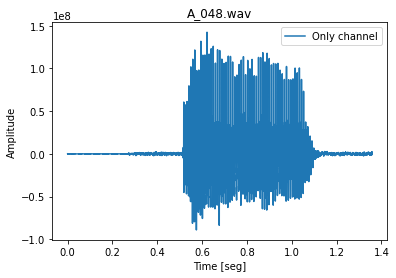

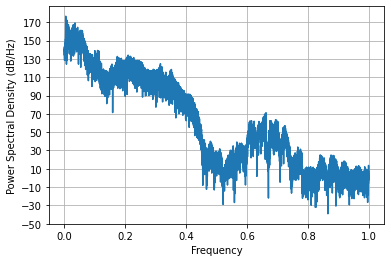

Duración:  1.3578333333333332


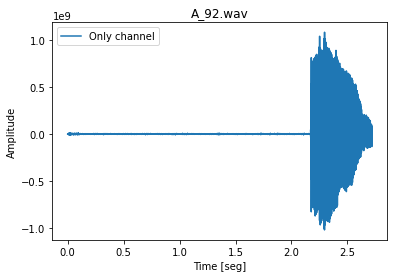

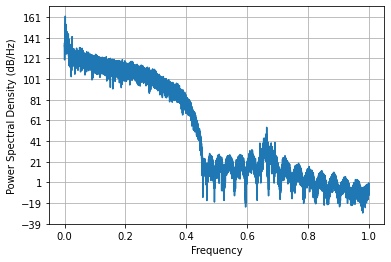

Duración:  2.72


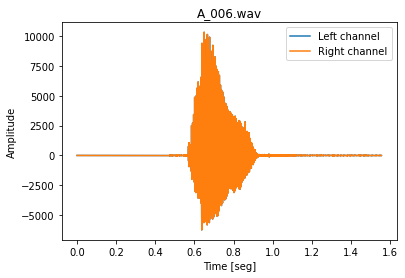

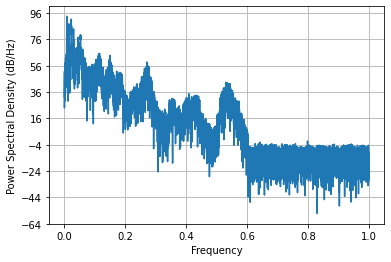

Duración:  1.55575


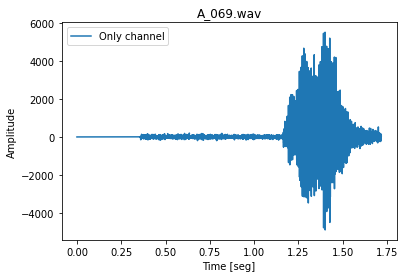

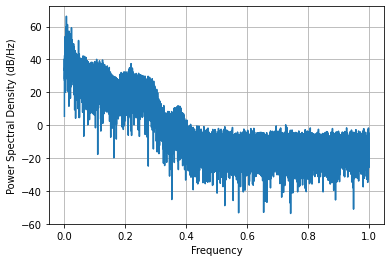

Duración:  1.7178333333333333


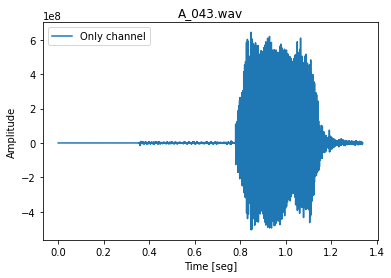

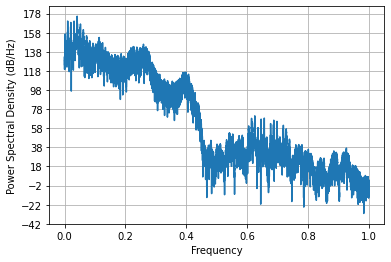

Duración:  1.3378333333333334


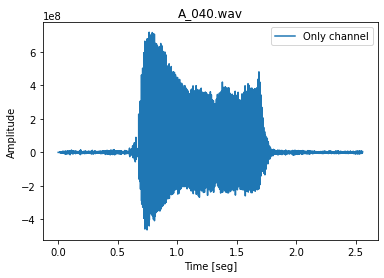

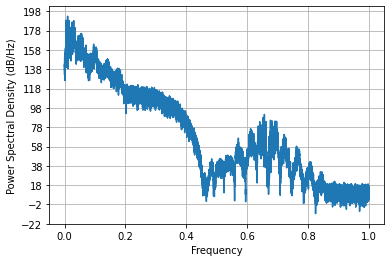

Duración:  2.5578333333333334


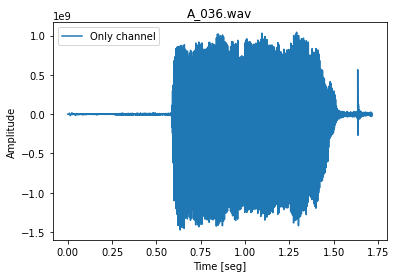

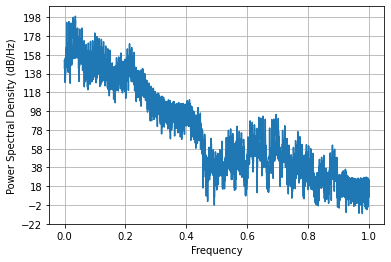

Duración:  1.7178333333333333


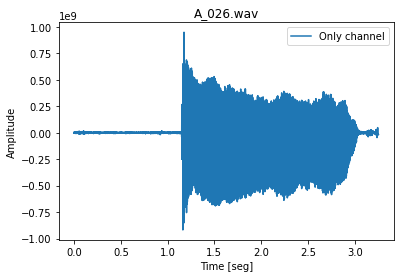

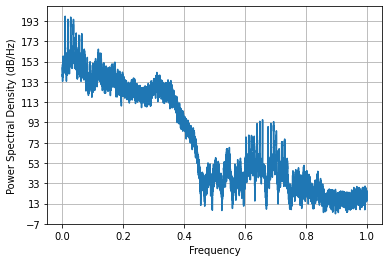

Duración:  3.2535


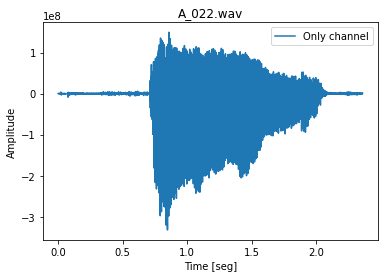

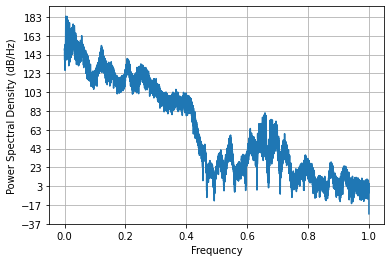

Duración:  2.3578333333333332


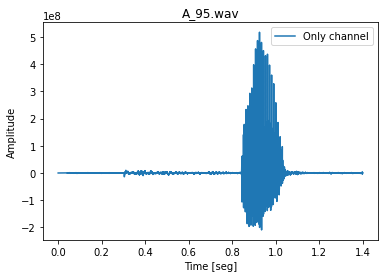

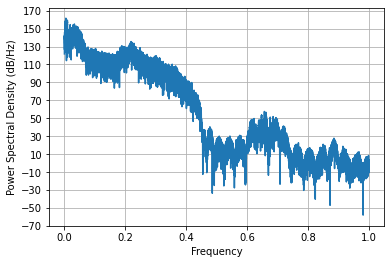

Duración:  1.4


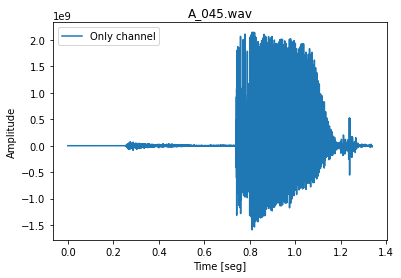

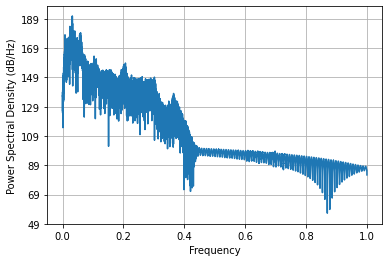

Duración:  1.3378333333333334


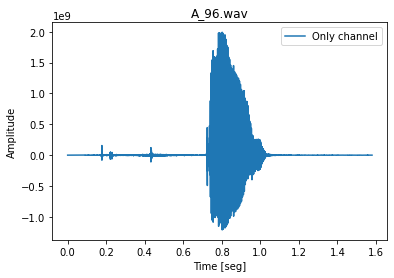

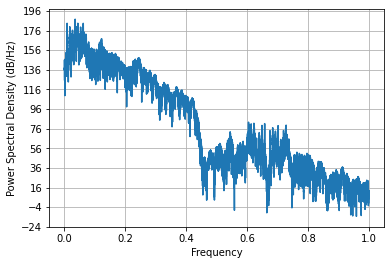

Duración:  1.58


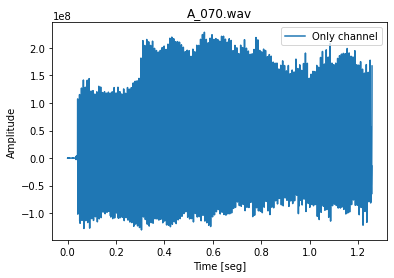

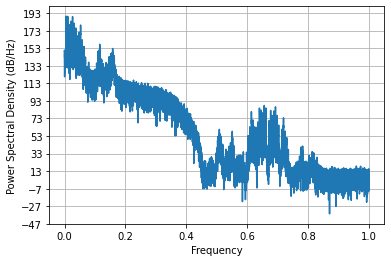

Duración:  1.2578333333333334


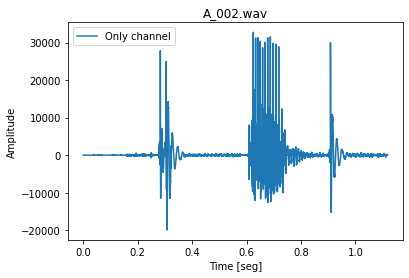

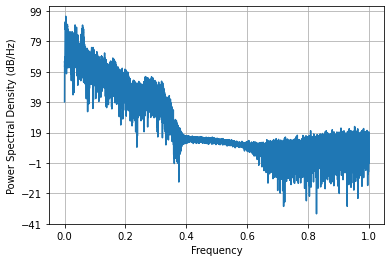

Duración:  1.1179375


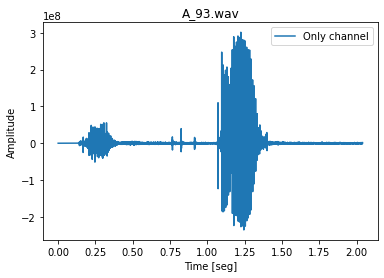

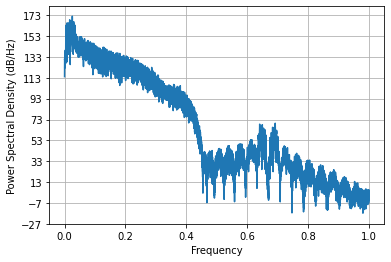

Duración:  2.04


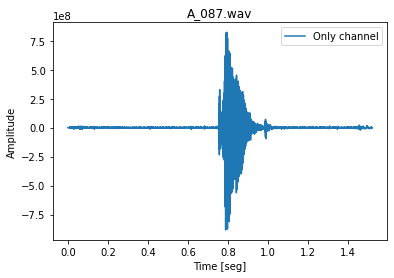

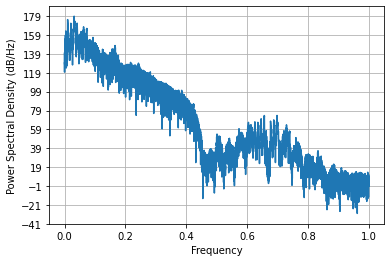

Duración:  1.52


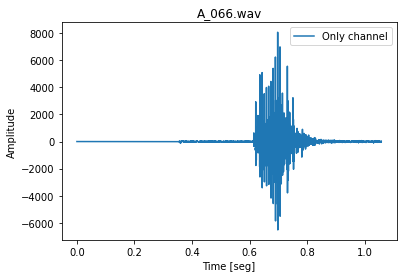

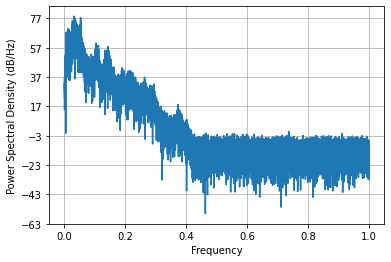

Duración:  1.0578333333333334


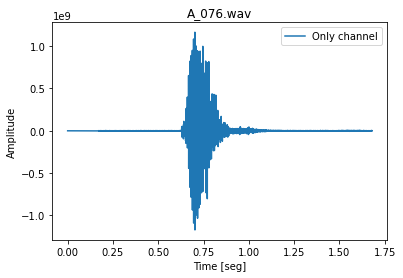

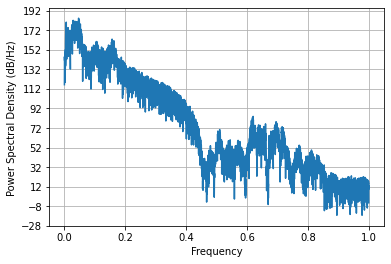

Duración:  1.68


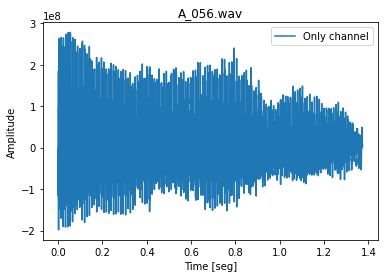

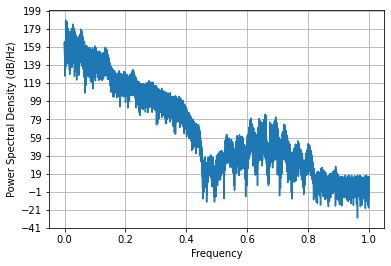

Duración:  1.3735


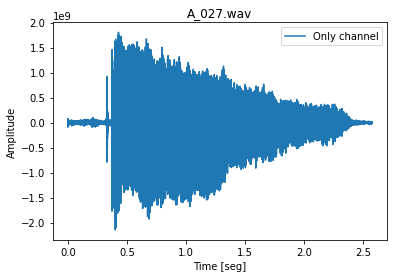

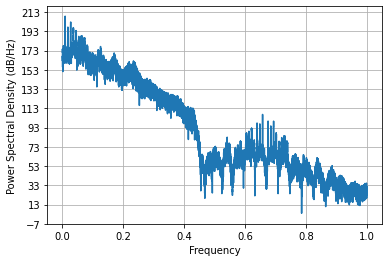

Duración:  2.5735


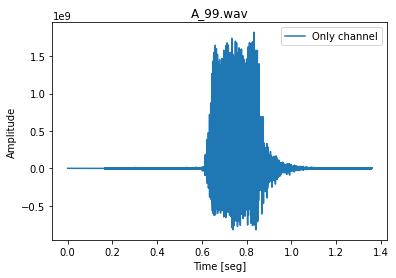

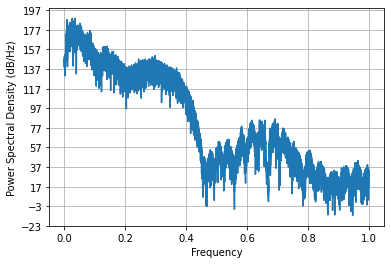

Duración:  1.36


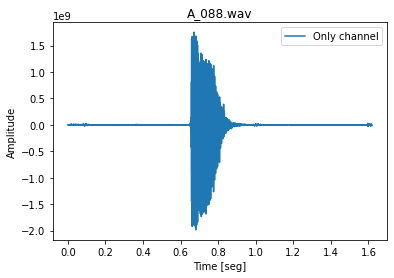

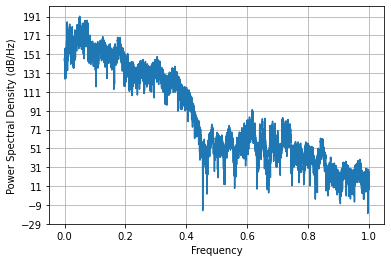

Duración:  1.62


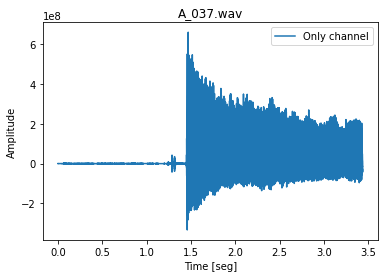

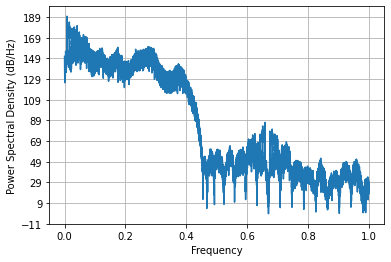

Duración:  3.4378333333333333


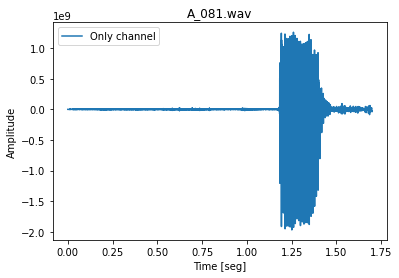

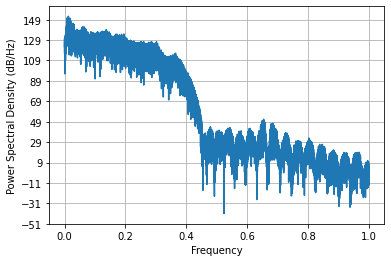

Duración:  1.7


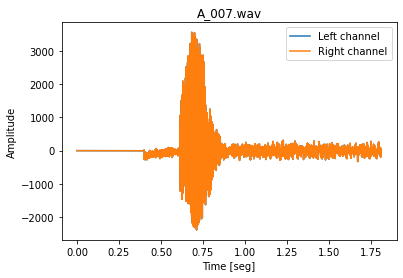

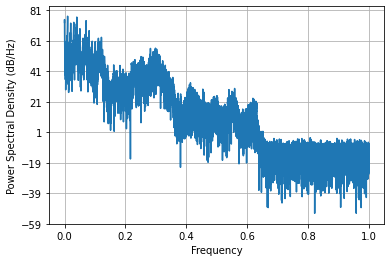

Duración:  1.8111666666666666


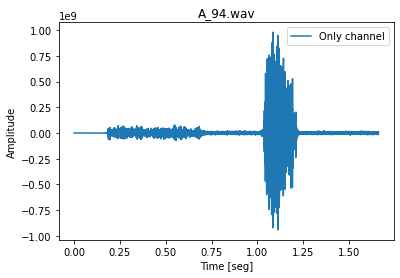

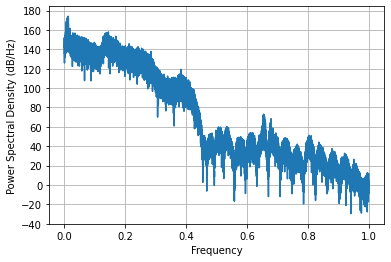

Duración:  1.66


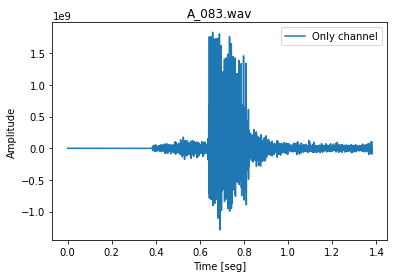

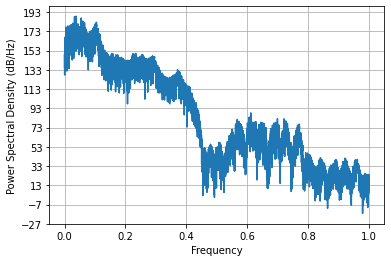

Duración:  1.38


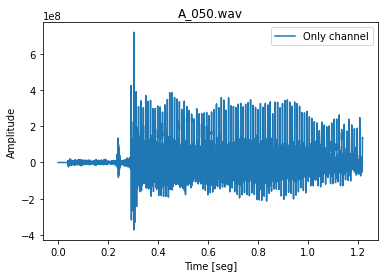

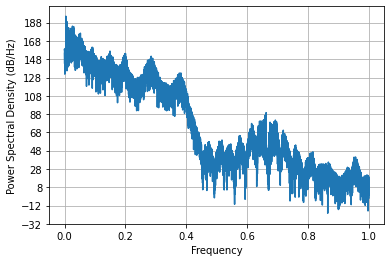

Duración:  1.2178333333333333


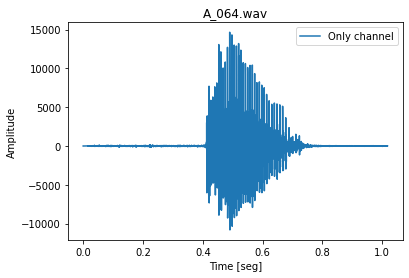

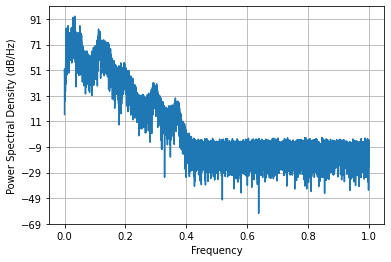

Duración:  1.0178333333333334


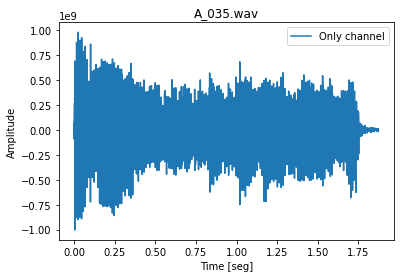

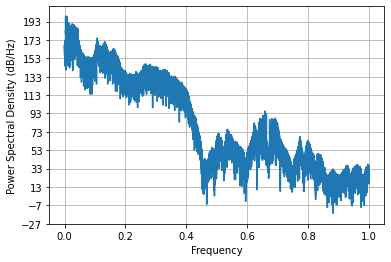

Duración:  1.8735


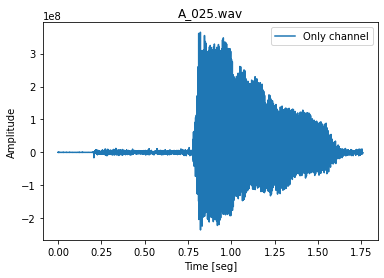

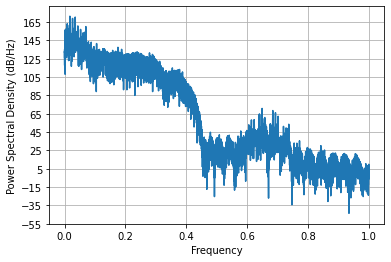

Duración:  1.7578333333333334


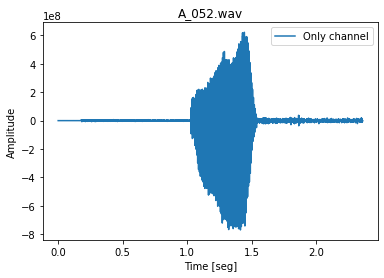

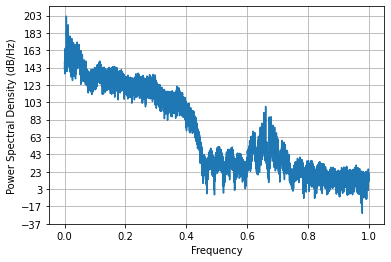

Duración:  2.3578333333333332


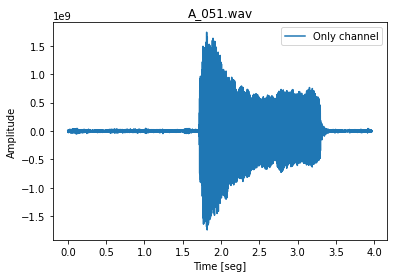

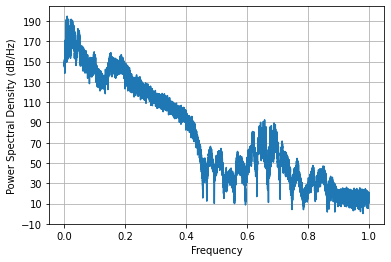

Duración:  3.9735


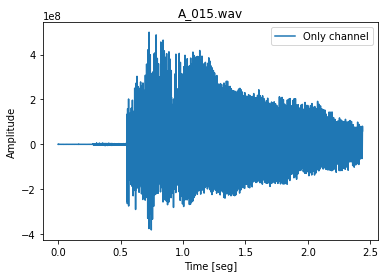

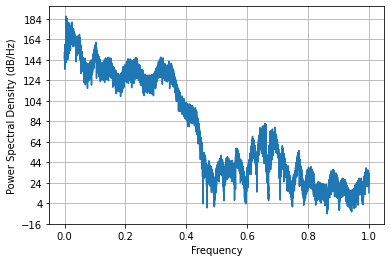

Duración:  2.4378333333333333


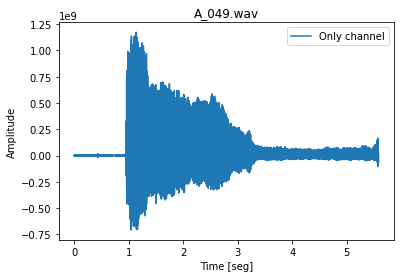

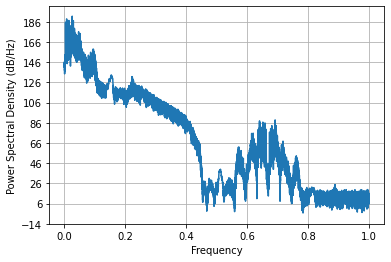

Duración:  5.58


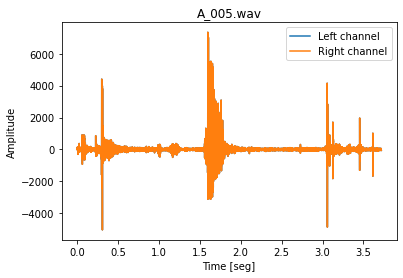

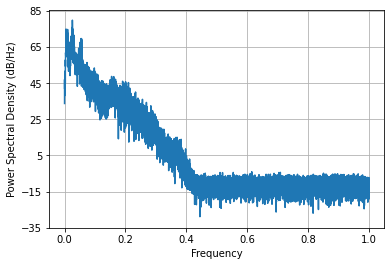

Duración:  3.7178333333333335


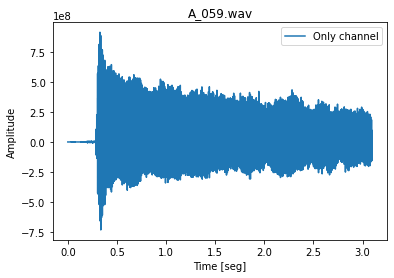

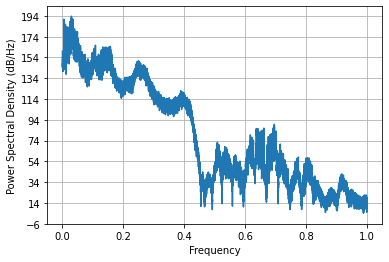

Duración:  3.0978333333333334


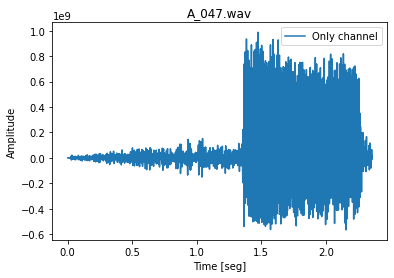

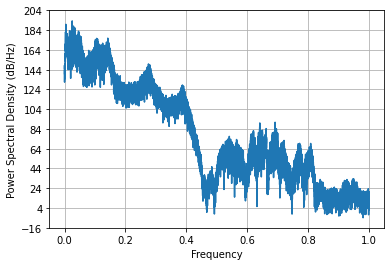

Duración:  2.3578333333333332


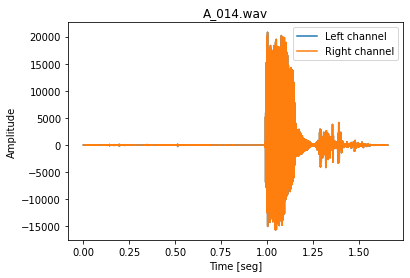

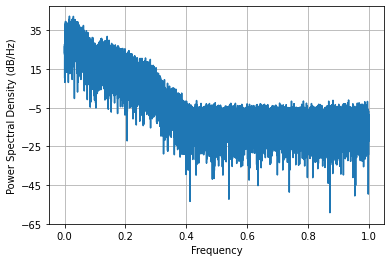

Duración:  1.6578333333333333


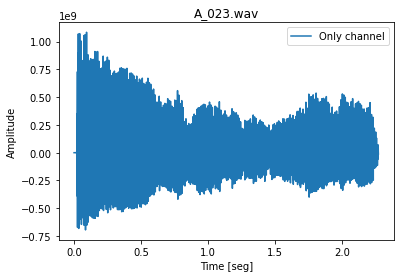

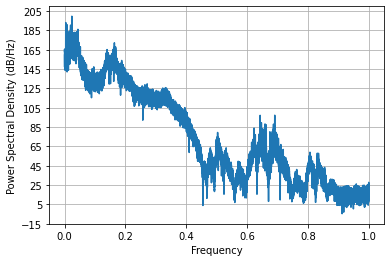

Duración:  2.2735


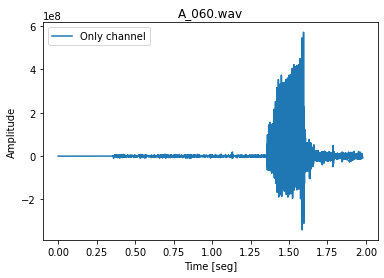

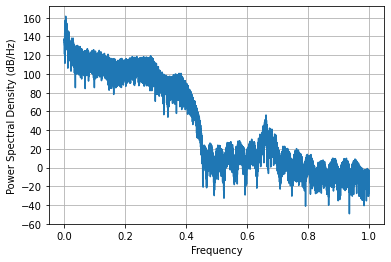

Duración:  1.9778333333333333


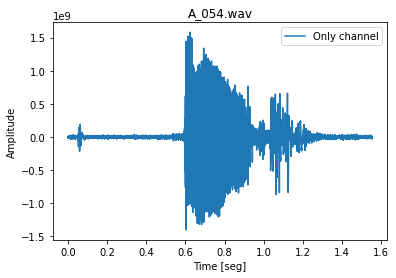

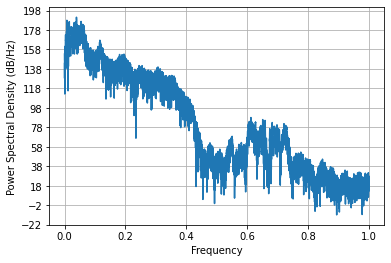

Duración:  1.5535


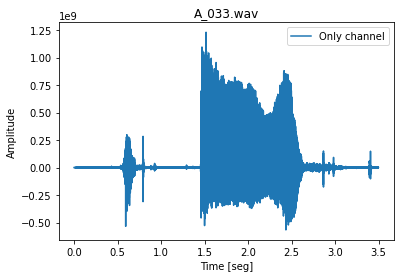

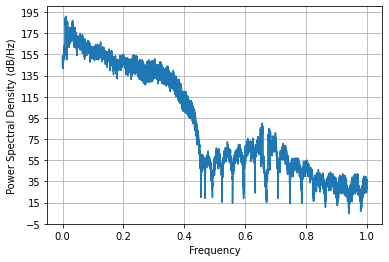

Duración:  3.4978333333333333


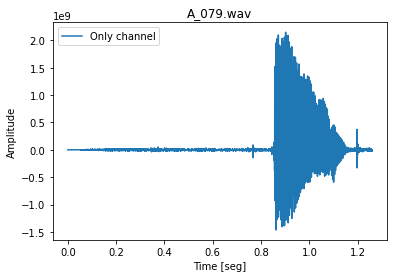

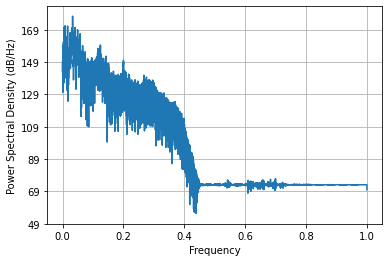

Duración:  1.26


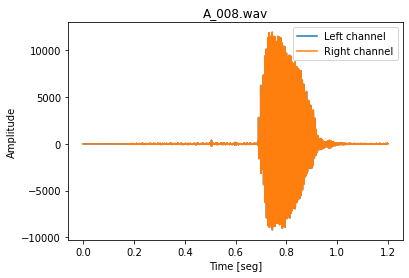

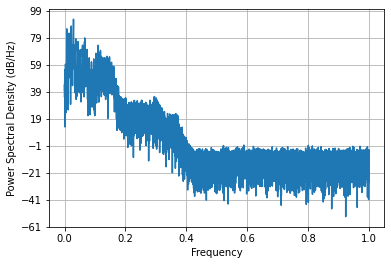

Duración:  1.1978333333333333


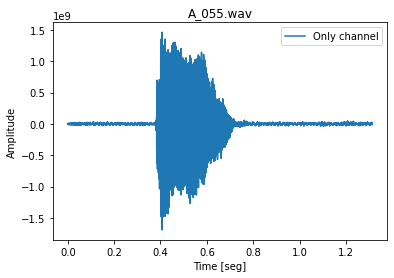

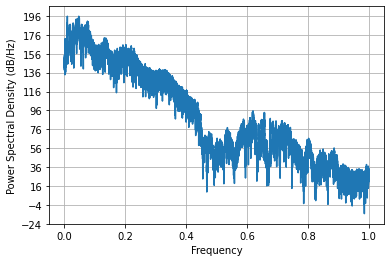

Duración:  1.3135


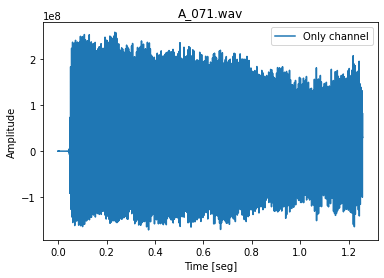

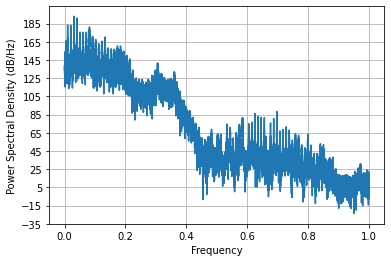

Duración:  1.2578333333333334


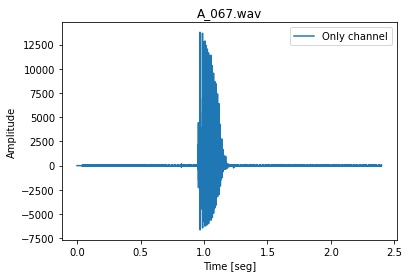

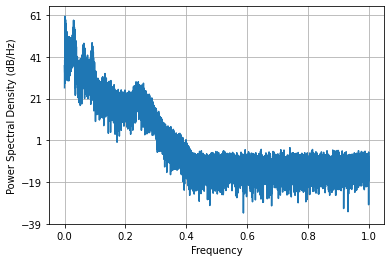

Duración:  2.3978333333333333


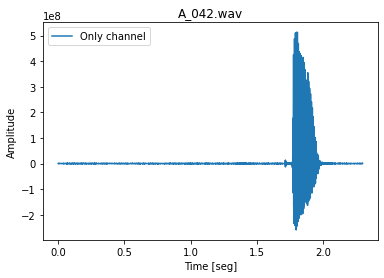

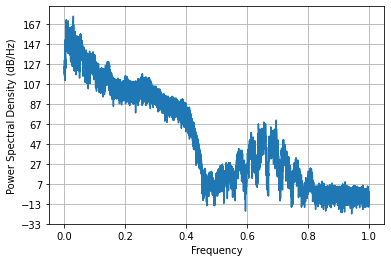

Duración:  2.297833333333333


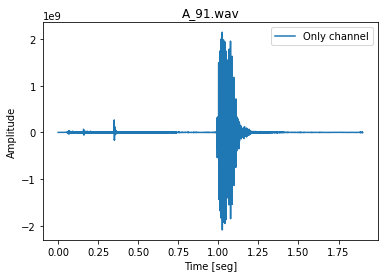

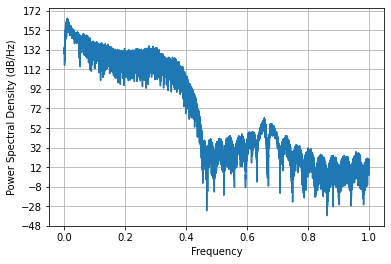

Duración:  1.9


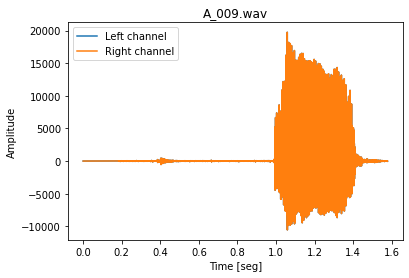

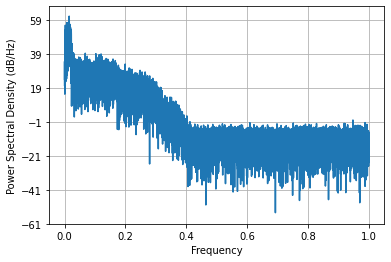

Duración:  1.5778333333333334


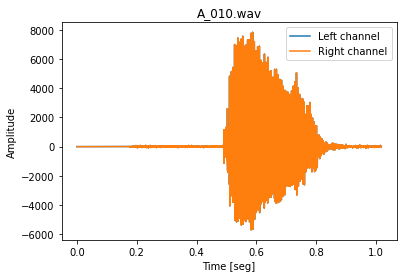

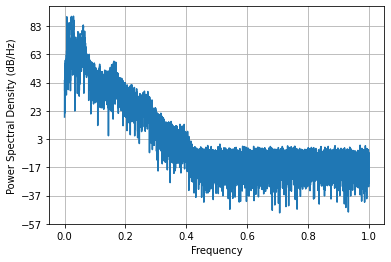

Duración:  1.0178333333333334


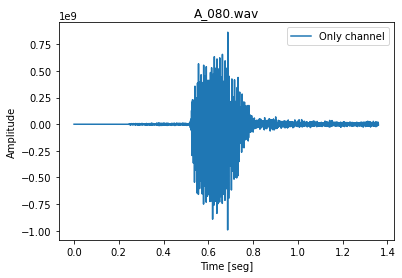

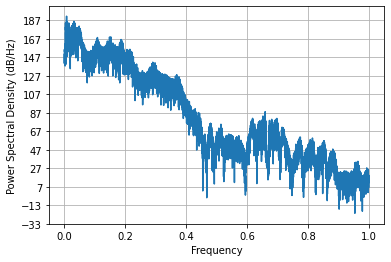

Duración:  1.36


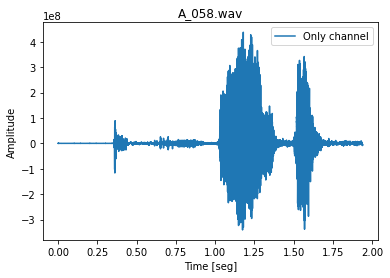

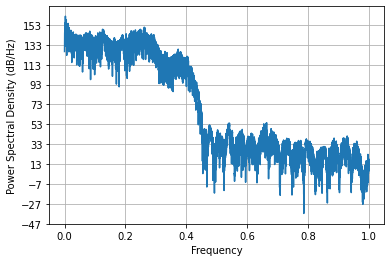

Duración:  1.9378333333333333


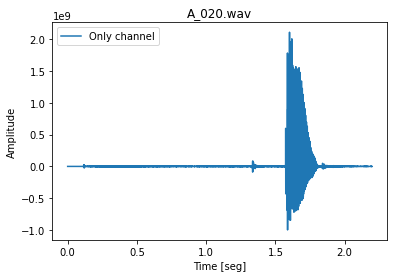

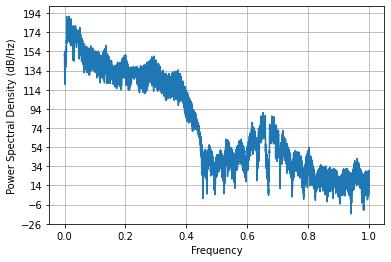

Duración:  2.1978333333333335


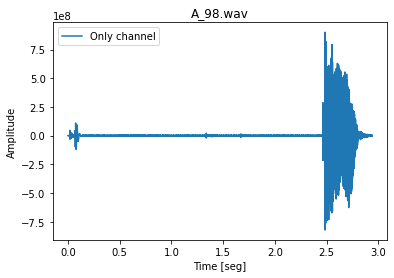

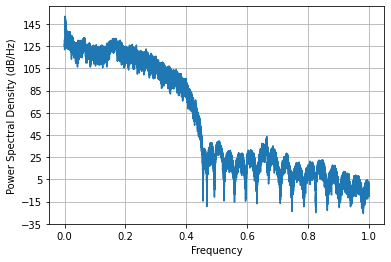

Duración:  2.94


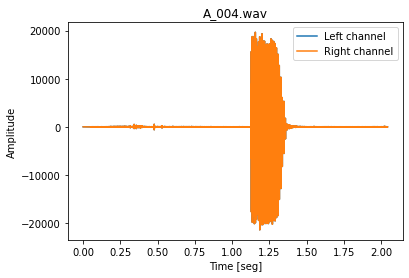

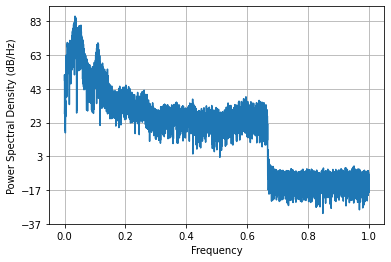

Duración:  2.043375


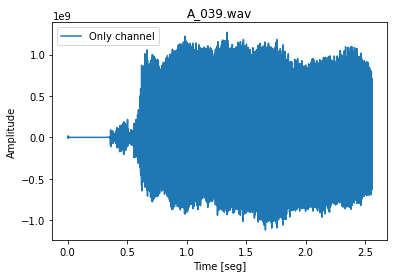

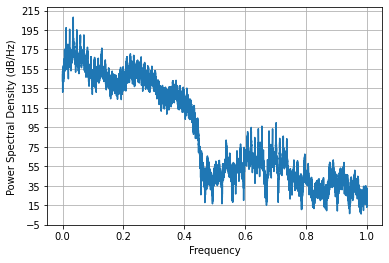

Duración:  2.5578333333333334


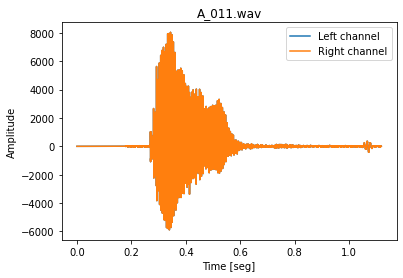

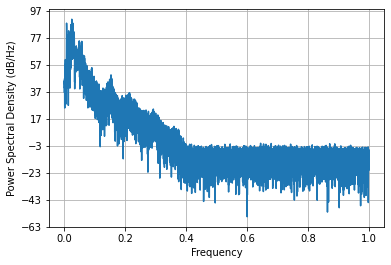

Duración:  1.1178333333333332


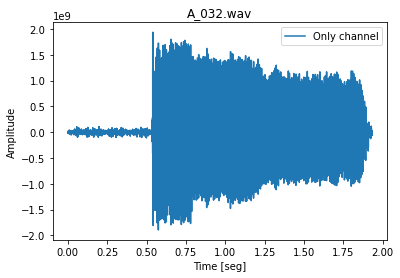

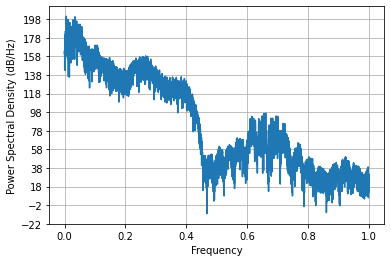

Duración:  1.9335


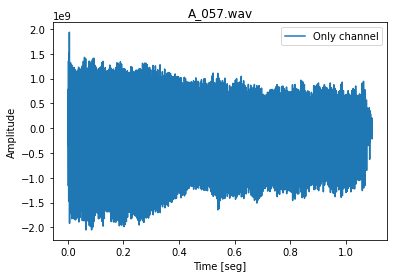

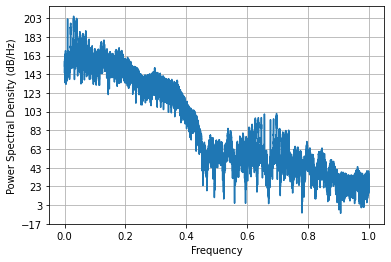

Duración:  1.0935


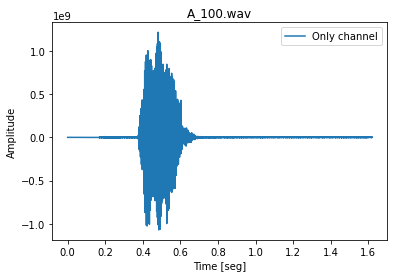

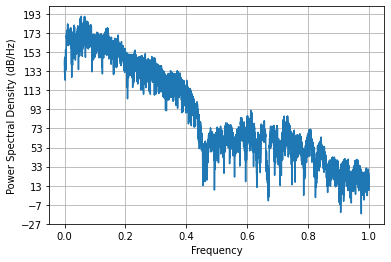

Duración:  1.62


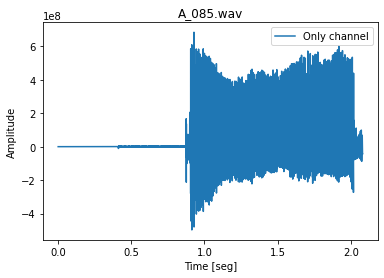

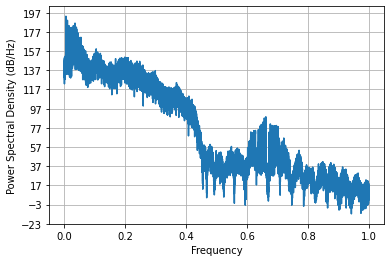

Duración:  2.08


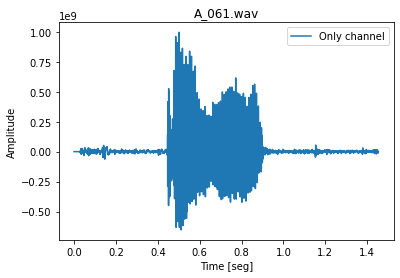

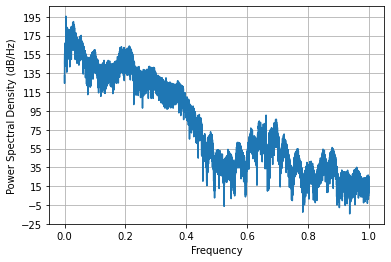

Duración:  1.4535


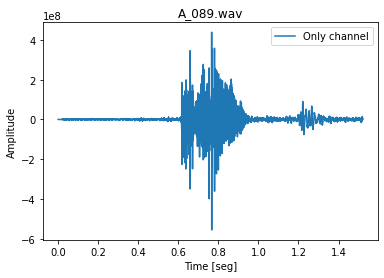

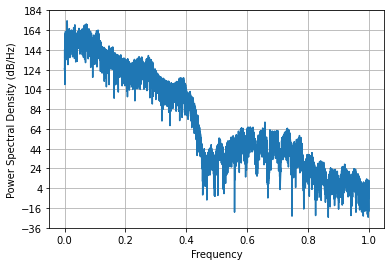

Duración:  1.52


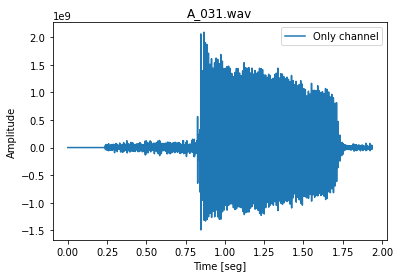

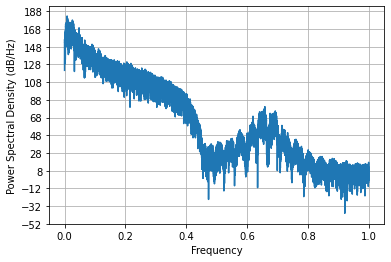

Duración:  1.9378333333333333


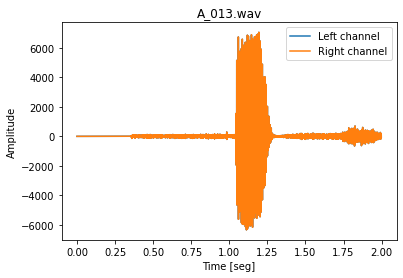

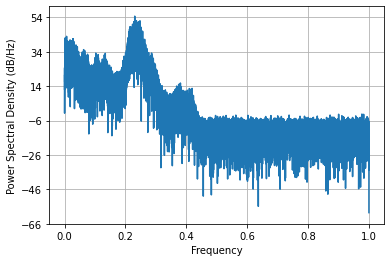

Duración:  1.9978333333333333


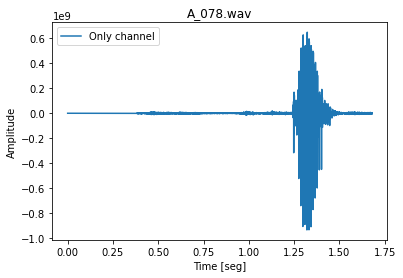

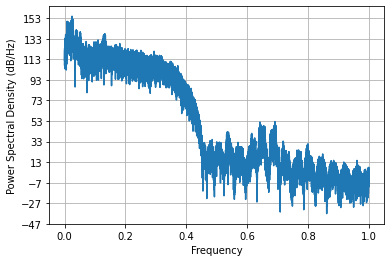

Duración:  1.68


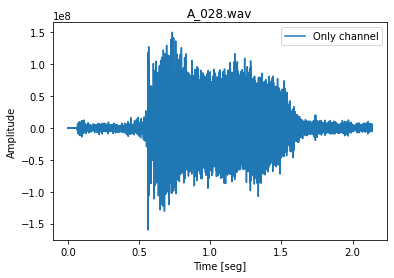

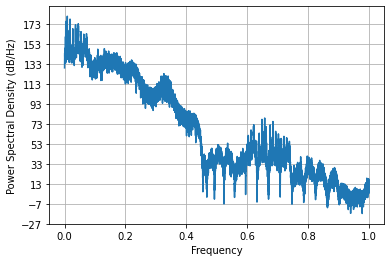

Duración:  2.1378333333333335


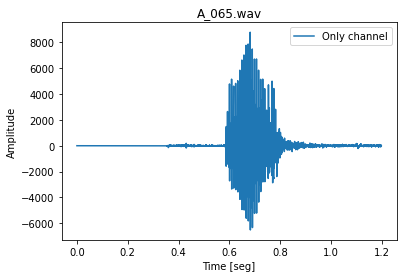

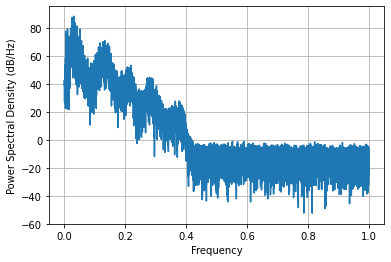

Duración:  1.1978333333333333


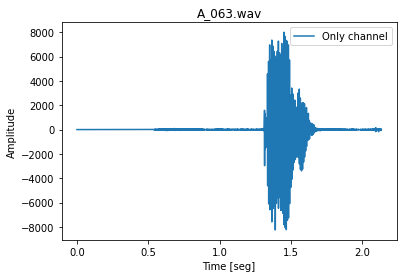

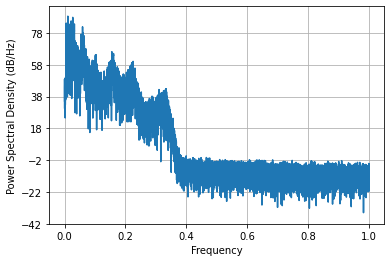

Duración:  2.1342916666666665


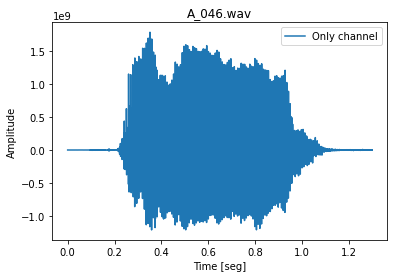

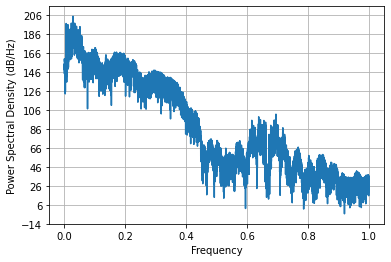

Duración:  1.2978333333333334


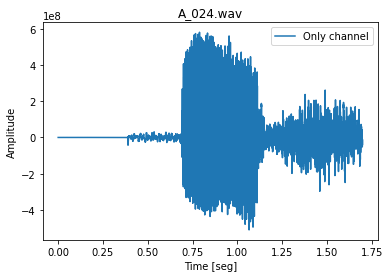

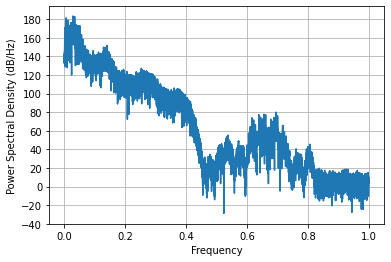

Duración:  1.6978333333333333


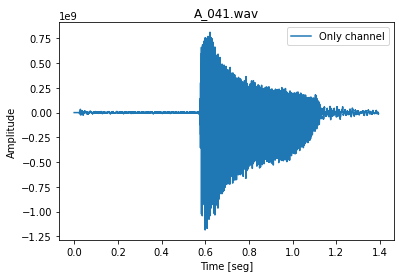

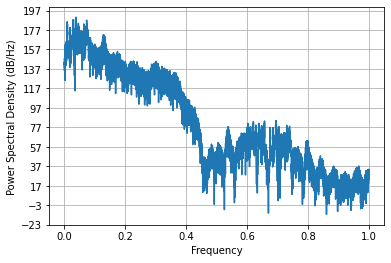

Duración:  1.3935


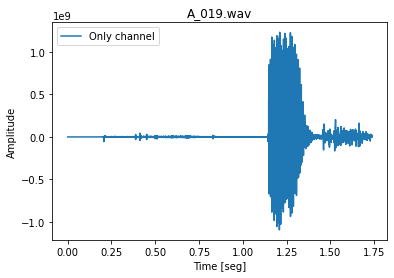

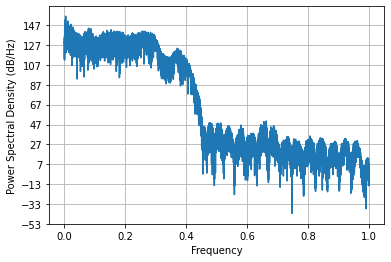

Duración:  1.7378333333333333


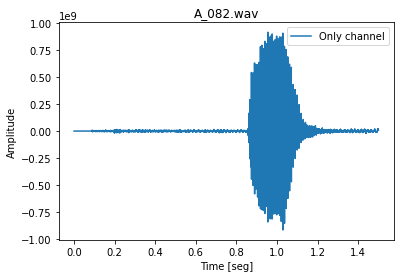

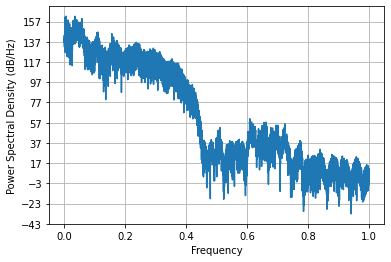

Duración:  1.5


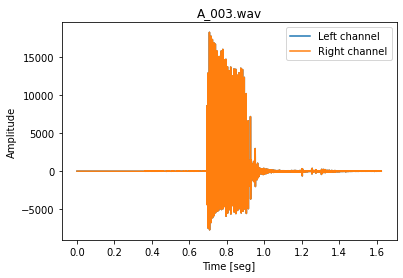

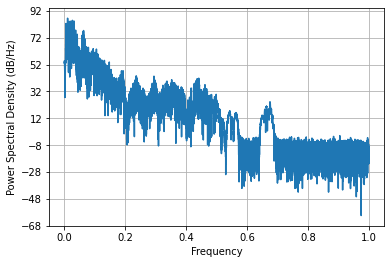

Duración:  1.6254166666666667


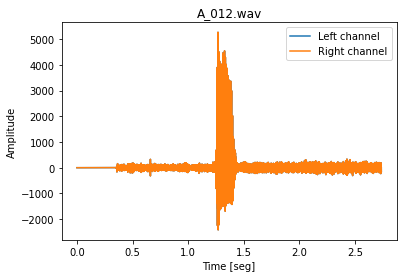

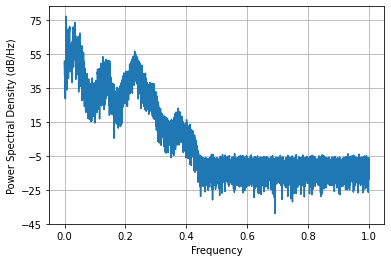

Duración:  2.737833333333333


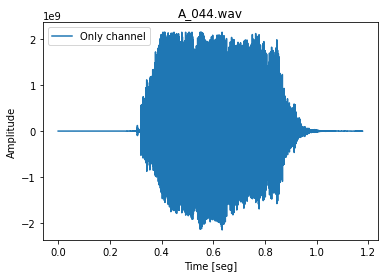

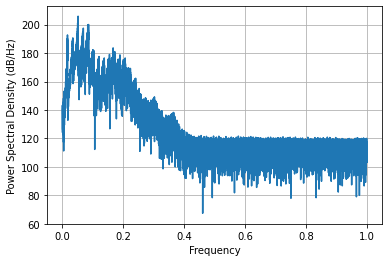

Duración:  1.1778333333333333


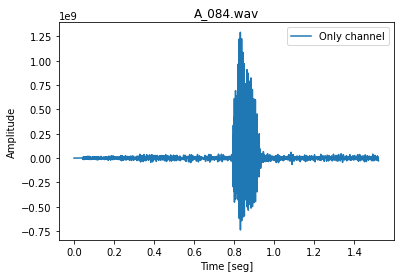

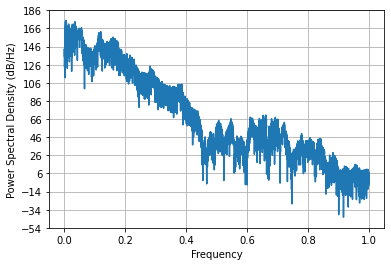

Duración:  1.52


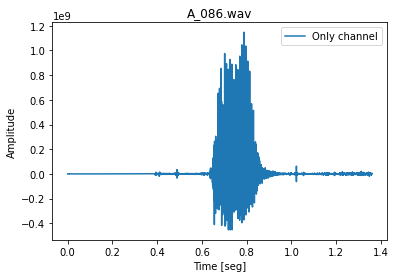

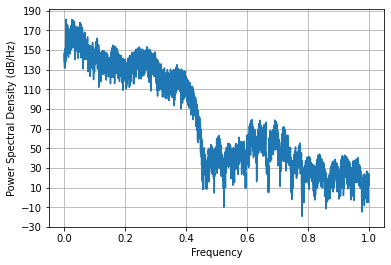

Duración:  1.36


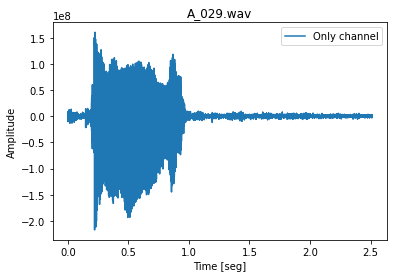

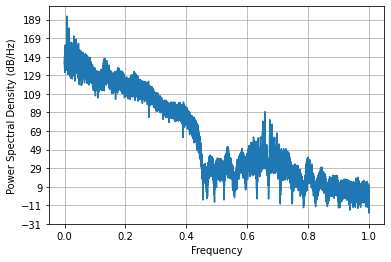

Duración:  2.5135


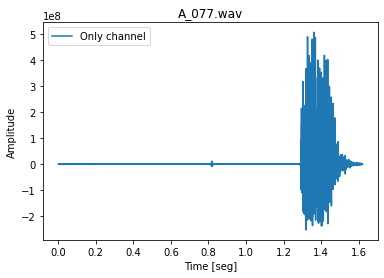

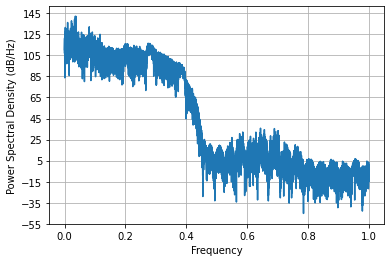

Duración:  1.62


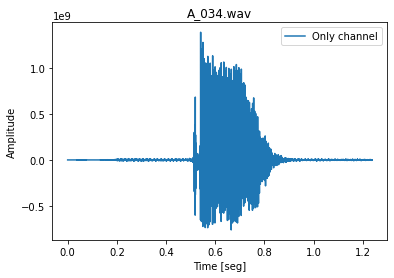

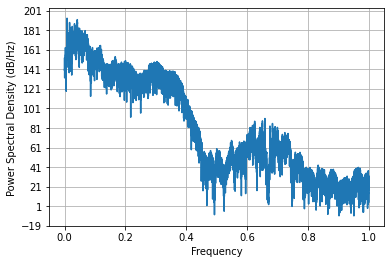

Duración:  1.2378333333333333


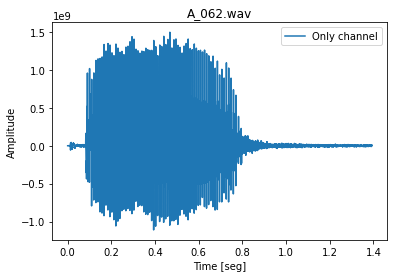

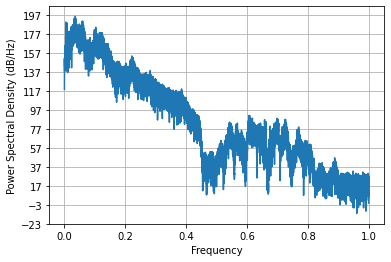

Duración:  1.3935


In [ ]:
for a in A_records:
    visualize_all_psd(path_A, a)

Ahora bien, de aquí no podemos sacar mucha información aún, es necesario realizar un preprocesamiento de los datos para aislar la onda del sonido e interpretarla de mejor manera. En siguiente método lo utilizaremos a continuación (en la siguiente sección) para llevar a cabo el preprocesamiento de los datos.

#**Preprocesamiento de los datos**

Heredamos algunas funcionalidades y gráficas de la sección anterior para poder visualizar cómo se está llevando a cabo el **preprocesamiento de los datos**:

La representación de la señal de audio que hicimos antes representa una señal de audio en el **dominio del tiempo**. Muestra la intensidad (volumen o amplitud) de la onda sonora con respecto al tiempo. Porciones con **amplitud = 0**, representan **silencio**.


In [12]:
def visualize_wave(samplerate, data):
    if (isinstance(data[0], np.ndarray)):
        length = data.shape[0] / samplerate    
        time = np.linspace(0., length, data.shape[0])
        plt.plot(time, data[:, 0], label="Left channel")
        plt.plot(time, data[:, 1], label="Right channel")
        plt.legend()
        plt.xlabel("Time [seg]")
        plt.ylabel("Amplitude")
        plt.show()
        #plt.psd(data[:, 1], samplerate)
        #plt.show()
    else:
        length = len(data) / samplerate
        time = np.linspace(0., length, len(data))
        plt.plot(time, data, label="Only channel")
        plt.legend()
        plt.xlabel("Time [seg]")
        plt.ylabel("Amplitude")
        plt.show()
        #plt.psd(data, samplerate)
        #plt.show()
    print("Duración: ", length, "seg")

Ahora bien, como vimos anteriormente, los datos pueden presentar mucho **ruido** y tener **distintos volúmenes** para cada nota de voz, pero también **silencios** en los que los datos son insignificantes.

Notemos lo siguiente: podemos eliminar los trozos en los que no hay sonido, encontrando el **centro de masa del vector** y un **epsilon al rededor de ese centro de masa**. Asumimos que la vocal sucede cuando hay mayores amplitudes.

Así, podemos eliminar los trozos del audio en los que no hay sonido, tenemos la ventaja de que solamente habrá un único pico en el momento en que la persona pronuncia la vocal: el centro de masa es único.

In [13]:
def remove_silences_signal(samplerate, data):
    centermass = 0
    mass = 0
    disperssion_eps_idx = 10000
    if (isinstance(data[0], np.ndarray)):
        for i in range(len(data)):
            centermass += abs(data[i, 1])*i
            mass += abs(data[i, 1])
        centermass_idx = int(centermass/mass)
    else:        
        for i in range(len(data)):
            centermass += abs(data[i])*i
            mass += abs(data[i])
        centermass_idx = int(centermass/mass)

    onda = data[centermass_idx-disperssion_eps_idx : centermass_idx+disperssion_eps_idx]
    return onda

Una vez que nos hemos deshecho de la mayor parte del ruido y silencios inútiles, el paso siguiente es **normalizar** los datos para garantizar que todas las notas de voz tienen una amplitud comparable, entre ellas. Para hacer esto, lo que hacemos es obtener el **promedio de la amplitud de la señal** y restarla a cada una de las muestras. Luego, dividimos entre el **máximo de la señal**. Así, centramos la señal al rededor de **cero** con una amplitud máxima de **uno**.

In [14]:
def normalize_signal(samplerate, data):
    if (isinstance(data[0], np.ndarray)):
        data = data[:, 1]
    
    maxim = max(data)
    prom = 0
    for i in range(len(data)):
        prom += data[i]
    prom = prom/len(data)

    norm_data = []
    for i in range(len(data)):
        norm_data.append((data[i] - prom)/maxim)
    return norm_data

Por último, una vez hemos encontrado el centro de masa y normalizado el audio, aplicamos un último filtro a los datos: eliminamos aquellas porciones del audio que son insignicantes incluso en la señal normalizada. La idea es la siguiente: ya normalizados los datos son comparables las notas de voz entre sí, independientemente de su volumen (amplitud); no en vano, aquellas porciones del audio que sean aún demasiado pequeñas corresponderan a ruido y no a variaciones en el volumen de la señal.

In [15]:
def cut_signal(samplerate, data):
    cutting = False
    i = 0
    if (isinstance(data[0], np.ndarray)):
        data = data[:, 1]
    while cutting == False:
        if abs(data[i]) >= 0.2:
            cutting = True
        else:
            i += 1
    length = len(data)/samplerate
    time = np.linspace(0., length, len(data))
    base_time = time[i]
    cut_data = []
    actual_time = []
    epoch = 0
    while epoch <= 0.2:
        cut_data.append(data[i])
        actual_time.append(time[i])
        epoch = actual_time[-1] - actual_time[0]
        #print(epoch)
        i += 1
    return cut_data

A_98.wav
list index out of range

A_053.wav


Traceback (most recent call last):
  File "<ipython-input-18-4f22b07e974e>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


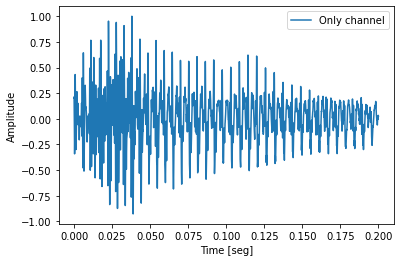

Duración:  0.20002083333333334 seg

A_051.wav


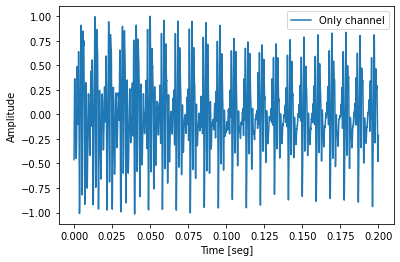

Duración:  0.20002083333333334 seg

A_074.wav


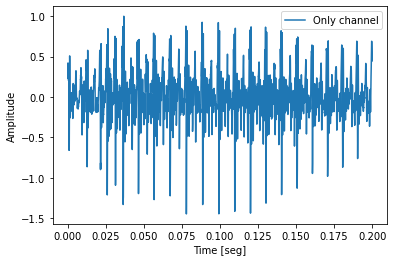

Duración:  0.20002083333333334 seg

A_016.wav


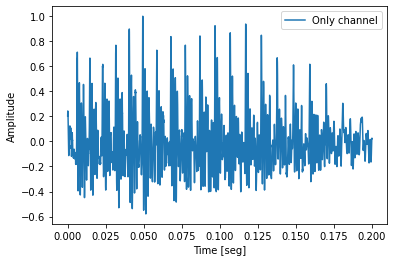

Duración:  0.20002083333333334 seg

A_040.wav


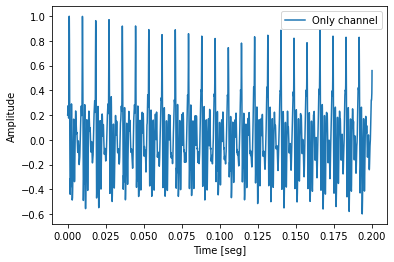

Duración:  0.20002083333333334 seg

A_024.wav


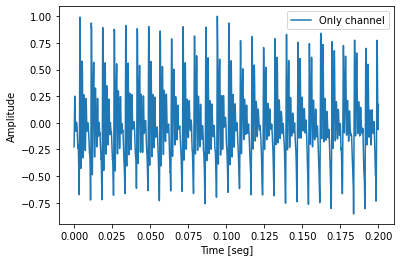

Duración:  0.20002083333333334 seg

A_069.wav


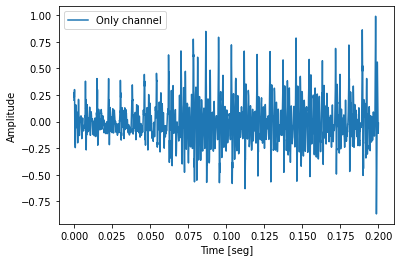

Duración:  0.20002083333333334 seg

A_99.wav


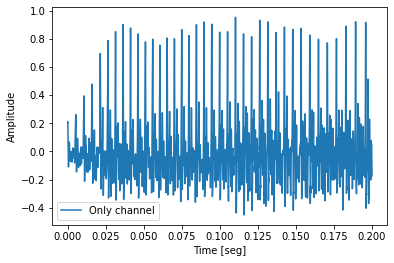

Duración:  0.20002083333333334 seg

A_94.wav
list index out of range

A_050.wav


Traceback (most recent call last):
  File "<ipython-input-18-4f22b07e974e>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


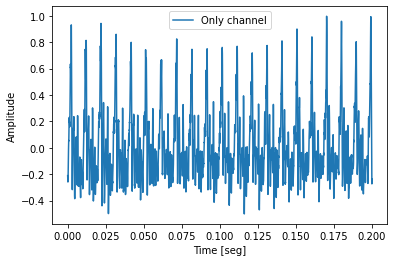

Duración:  0.20002083333333334 seg

A_065.wav


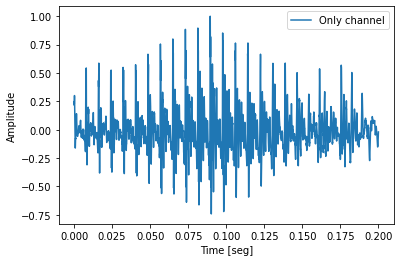

Duración:  0.20002083333333334 seg

A_029.wav


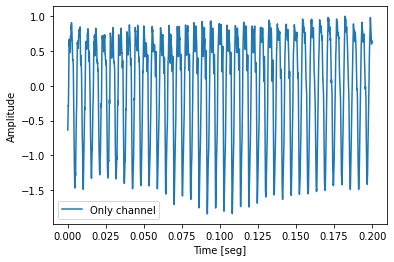

Duración:  0.20002083333333334 seg

A_087.wav


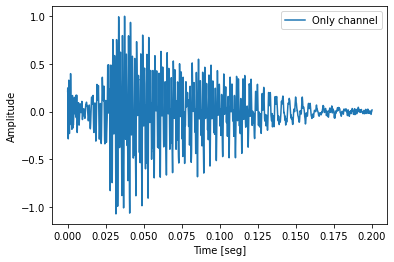

Duración:  0.20002083333333334 seg

A_017.wav


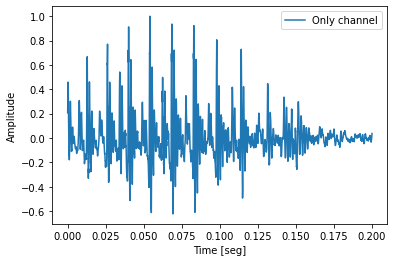

Duración:  0.20002083333333334 seg

A_055.wav


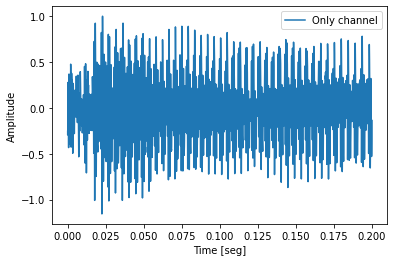

Duración:  0.20002083333333334 seg

A_061.wav


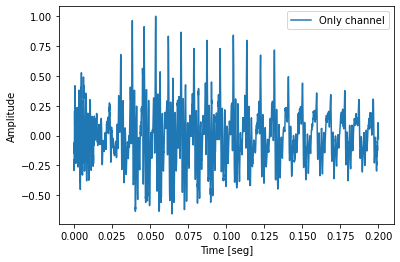

Duración:  0.20002083333333334 seg

A_085.wav


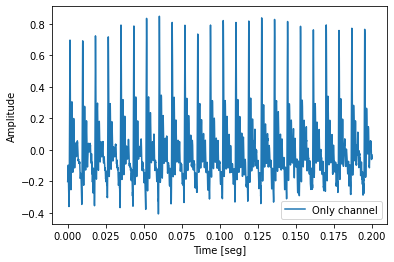

Duración:  0.20002083333333334 seg

A_079.wav


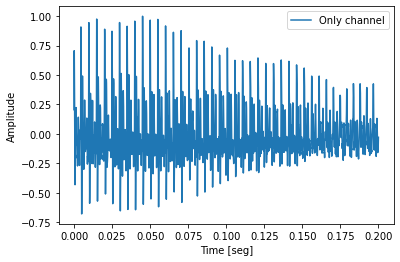

Duración:  0.20002083333333334 seg

A_003.wav


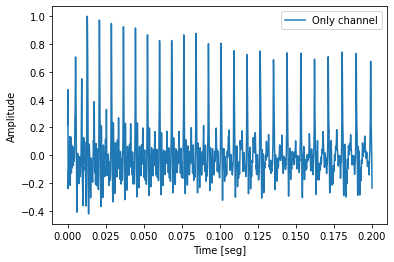

Duración:  0.20002083333333334 seg

A_011.wav


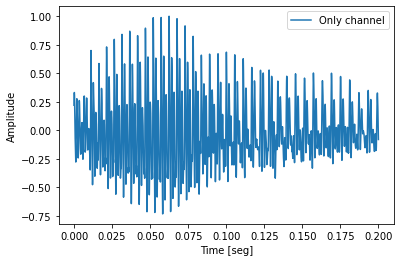

Duración:  0.20002083333333334 seg

A_95.wav


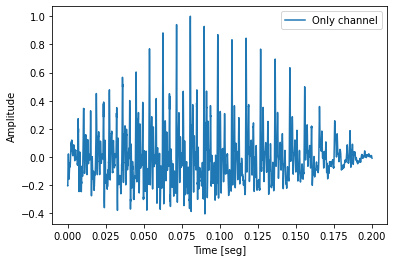

Duración:  0.20002083333333334 seg

A_064.wav


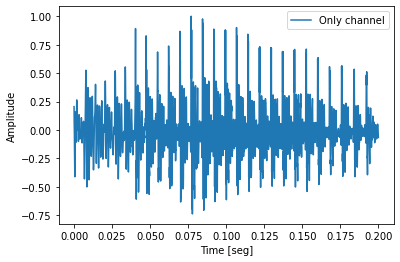

Duración:  0.20002083333333334 seg

A_035.wav


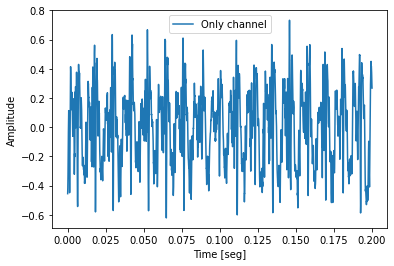

Duración:  0.20002083333333334 seg

A_081.wav


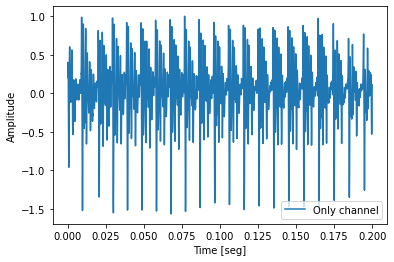

Duración:  0.20002083333333334 seg

A_046.wav


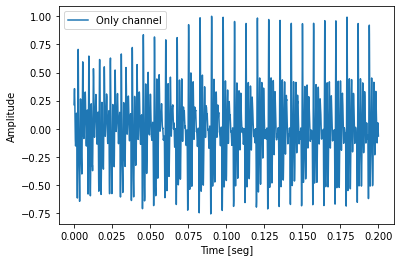

Duración:  0.20002083333333334 seg

A_041.wav


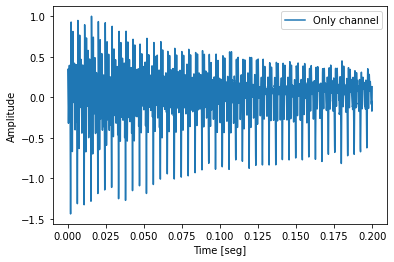

Duración:  0.20002083333333334 seg

A_049.wav


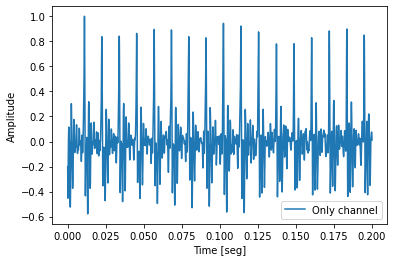

Duración:  0.20002083333333334 seg

A_97.wav


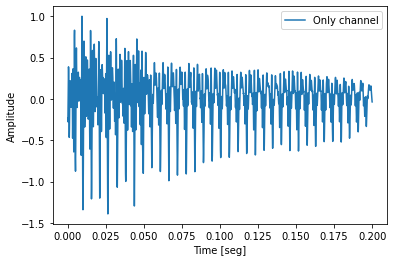

Duración:  0.20002083333333334 seg

A_100.wav


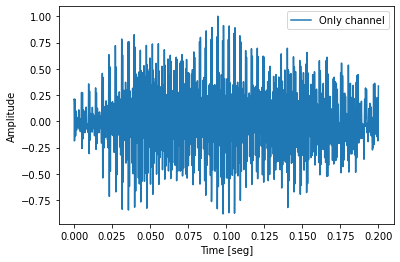

Duración:  0.20002083333333334 seg

A_026.wav


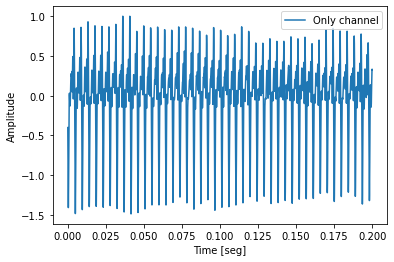

Duración:  0.20002083333333334 seg

A_002.wav


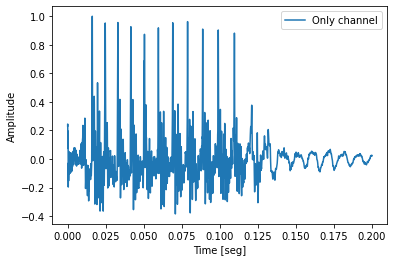

Duración:  0.20002083333333334 seg

A_084.wav


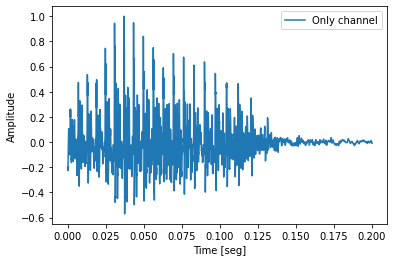

Duración:  0.20002083333333334 seg

A_059.wav


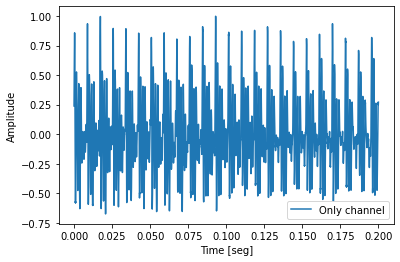

Duración:  0.20002083333333334 seg

A_089.wav


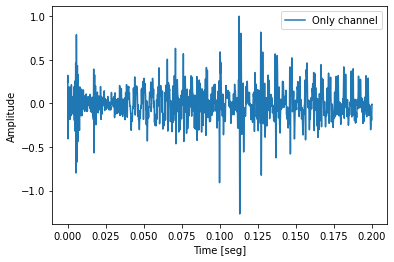

Duración:  0.20002083333333334 seg

A_068.wav


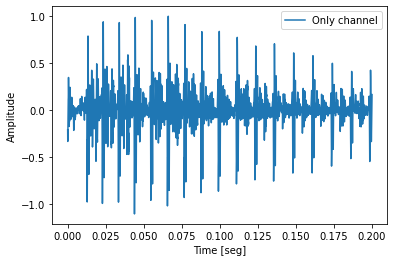

Duración:  0.20002083333333334 seg

A_042.wav


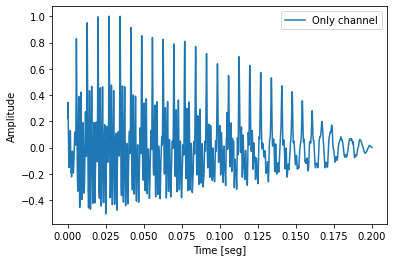

Duración:  0.20002083333333334 seg

A_036.wav


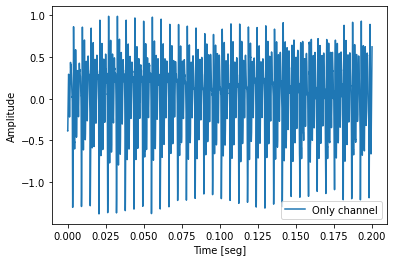

Duración:  0.20002083333333334 seg

A_013.wav


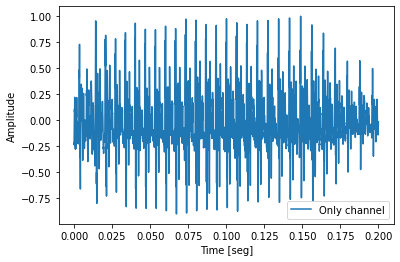

Duración:  0.20002083333333334 seg

A_090.wav


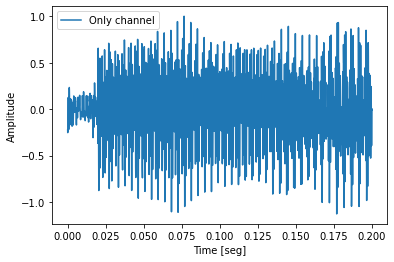

Duración:  0.20002083333333334 seg

A_031.wav


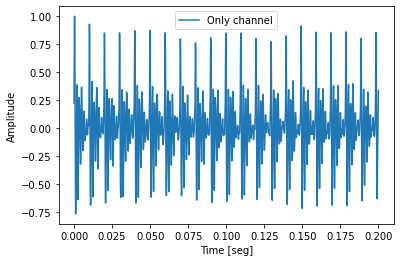

Duración:  0.20002083333333334 seg

A_018.wav


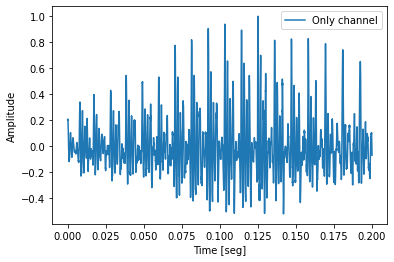

Duración:  0.20002083333333334 seg

A_009.wav


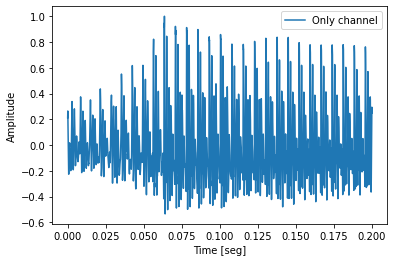

Duración:  0.20002083333333334 seg

A_019.wav


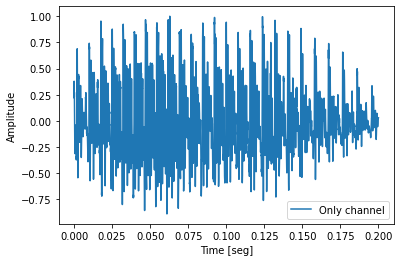

Duración:  0.20002083333333334 seg

A_045.wav


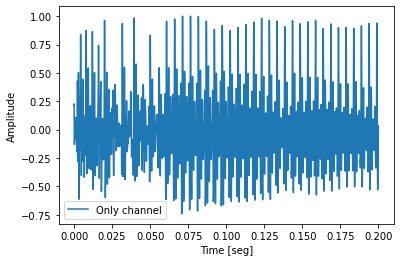

Duración:  0.20002083333333334 seg

A_93.wav


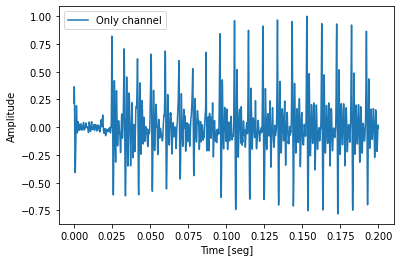

Duración:  0.20002083333333334 seg

A_030.wav


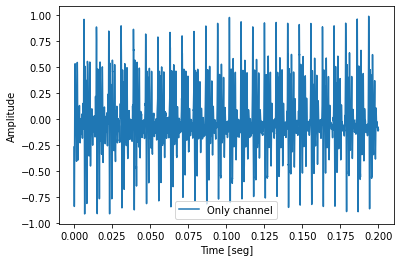

Duración:  0.20002083333333334 seg

A_034.wav


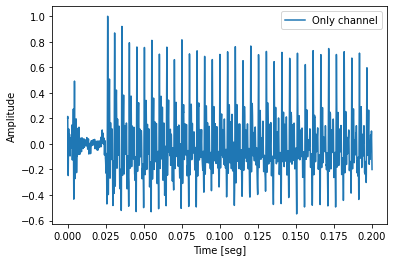

Duración:  0.20002083333333334 seg

A_083.wav


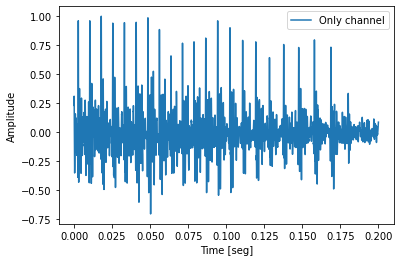

Duración:  0.20002083333333334 seg

A_057.wav


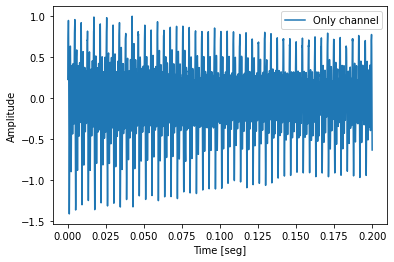

Duración:  0.20002083333333334 seg

A_088.wav


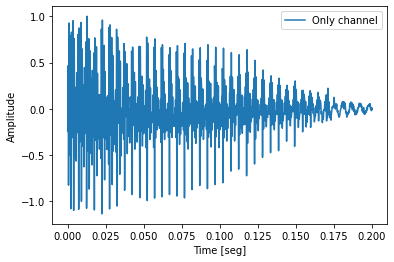

Duración:  0.20002083333333334 seg

A_96.wav


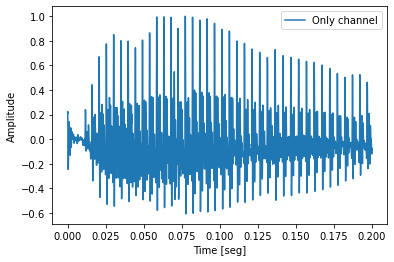

Duración:  0.20002083333333334 seg

A_022.wav


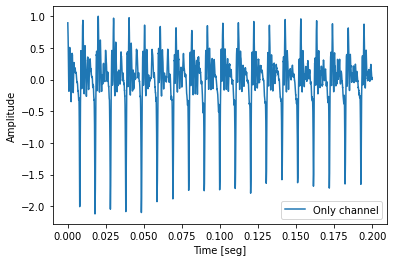

Duración:  0.20002083333333334 seg

A_008.wav


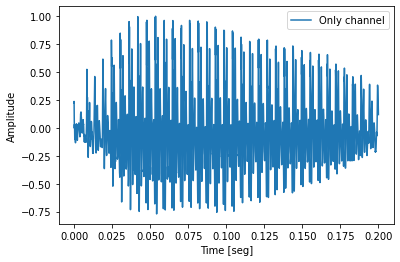

Duración:  0.20002083333333334 seg

A_028.wav


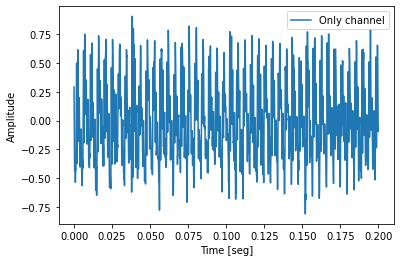

Duración:  0.20002083333333334 seg

A_006.wav


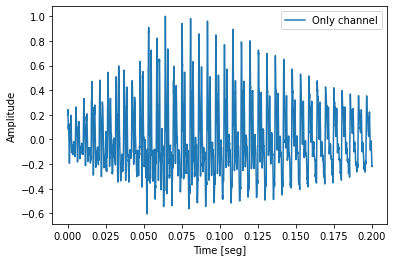

Duración:  0.20002083333333334 seg

A_072.wav


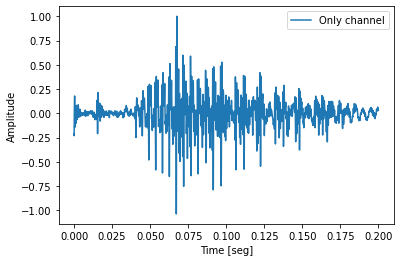

Duración:  0.20002083333333334 seg

A_063.wav


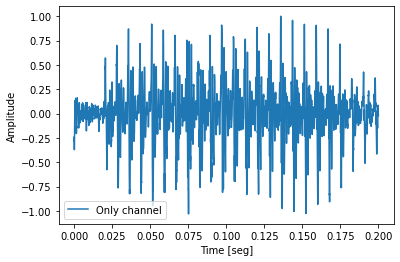

Duración:  0.20002083333333334 seg

A_058.wav


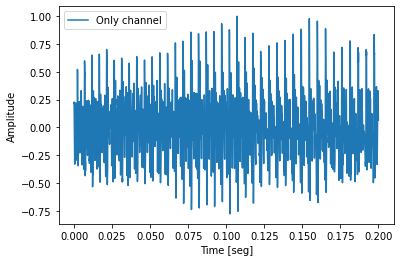

Duración:  0.20002083333333334 seg

A_048.wav


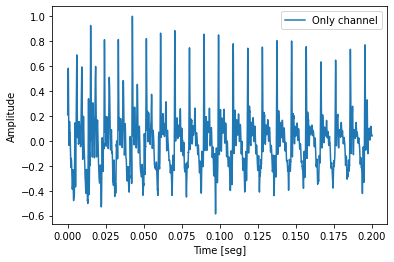

Duración:  0.20002083333333334 seg

A_032.wav


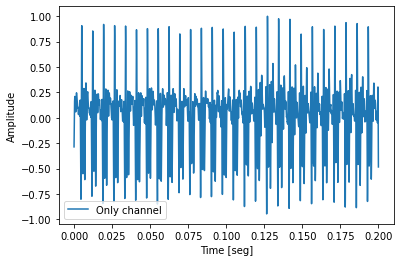

Duración:  0.20002083333333334 seg

A_007.wav


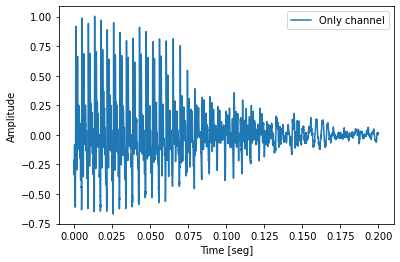

Duración:  0.20002083333333334 seg

A_001.wav


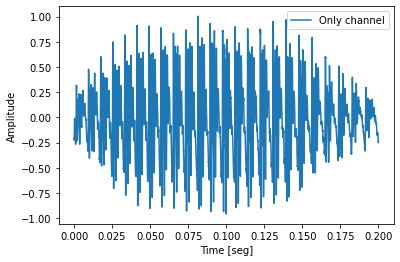

Duración:  0.20002083333333334 seg

A_025.wav


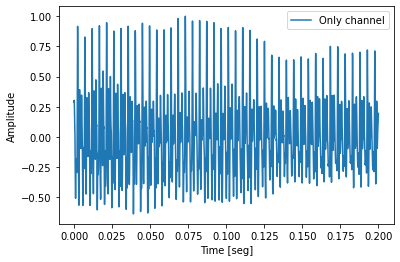

Duración:  0.20002083333333334 seg

A_082.wav


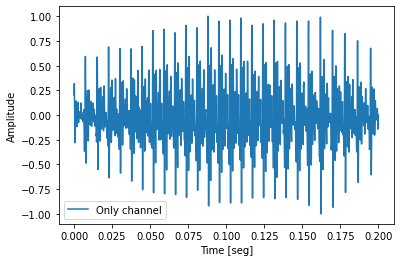

Duración:  0.20002083333333334 seg

A_052.wav


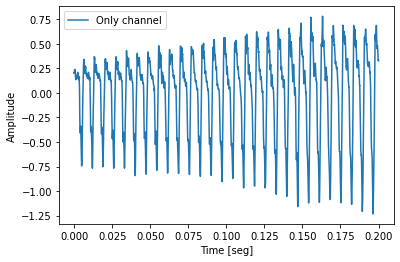

Duración:  0.20002083333333334 seg

A_005.wav


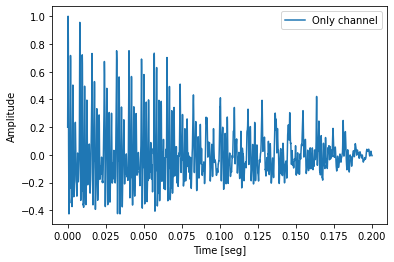

Duración:  0.20002083333333334 seg

A_078.wav


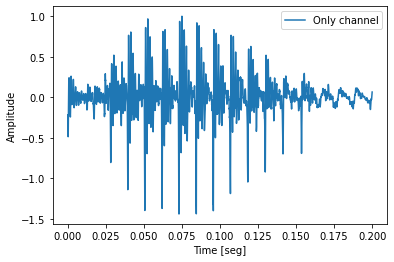

Duración:  0.20002083333333334 seg

A_91.wav


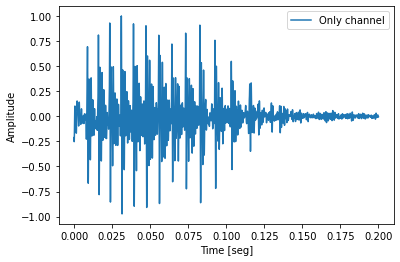

Duración:  0.20002083333333334 seg

A_060.wav


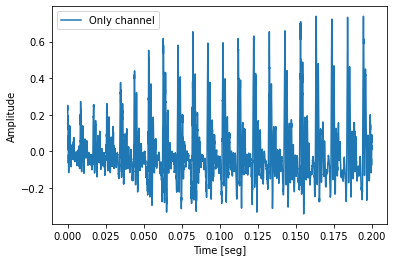

Duración:  0.20002083333333334 seg

A_92.wav


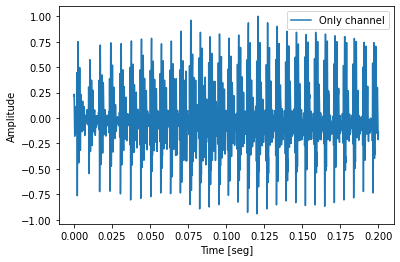

Duración:  0.20002083333333334 seg

A_080.wav


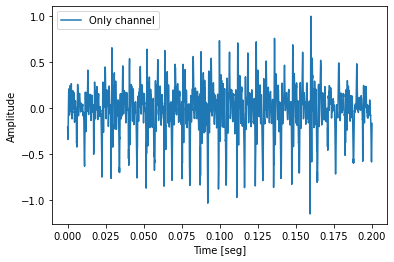

Duración:  0.20002083333333334 seg

A_038.wav


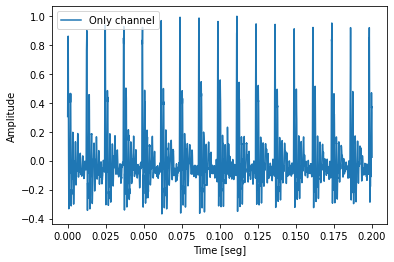

Duración:  0.20002083333333334 seg

A_021.wav


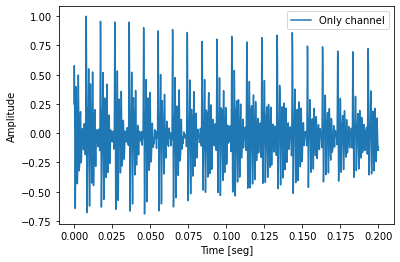

Duración:  0.20002083333333334 seg

A_015.wav


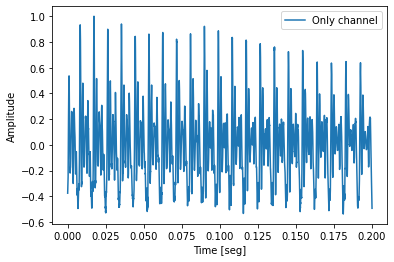

Duración:  0.20002083333333334 seg

A_075.wav


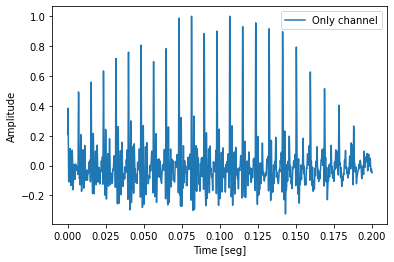

Duración:  0.20002083333333334 seg

A_047.wav


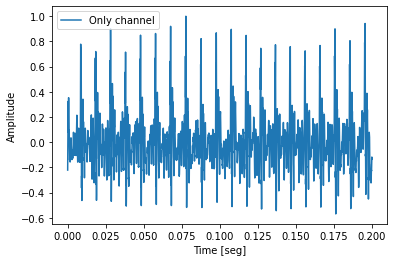

Duración:  0.20002083333333334 seg

A_070.wav


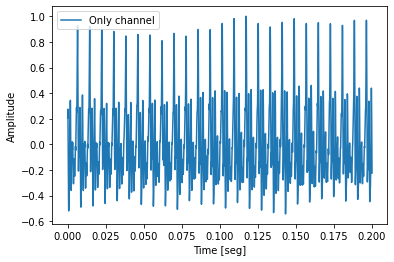

Duración:  0.20002083333333334 seg

A_067.wav


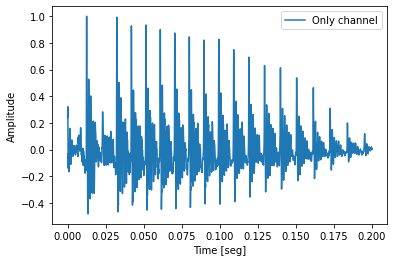

Duración:  0.20002083333333334 seg

A_020.wav


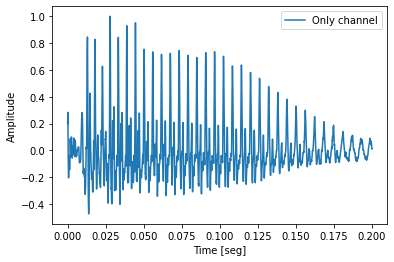

Duración:  0.20002083333333334 seg

A_039.wav


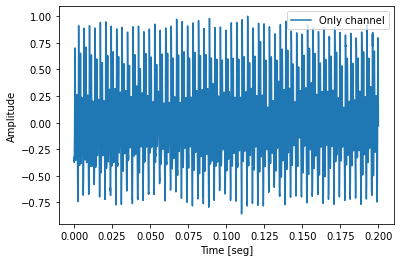

Duración:  0.20002083333333334 seg

A_012.wav


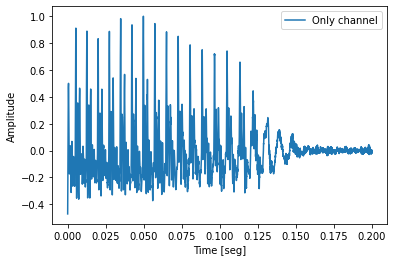

Duración:  0.20002083333333334 seg

A_071.wav


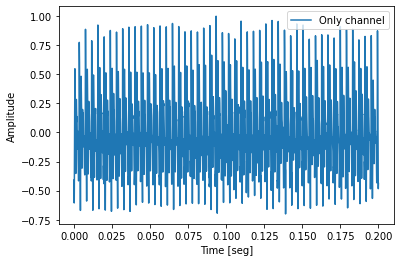

Duración:  0.20002083333333334 seg

A_027.wav


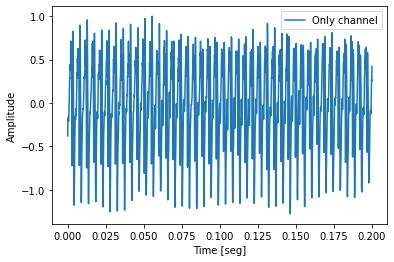

Duración:  0.20002083333333334 seg

A_044.wav


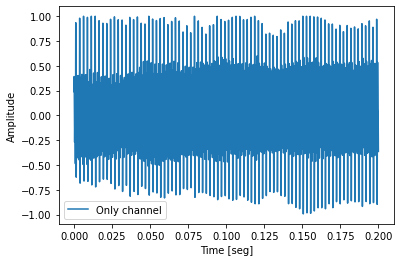

Duración:  0.20002083333333334 seg

A_086.wav


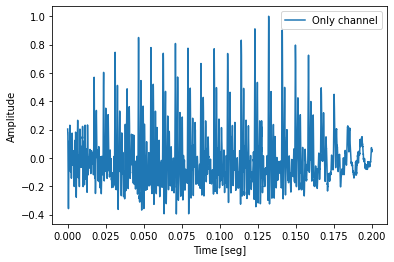

Duración:  0.20002083333333334 seg

A_033.wav


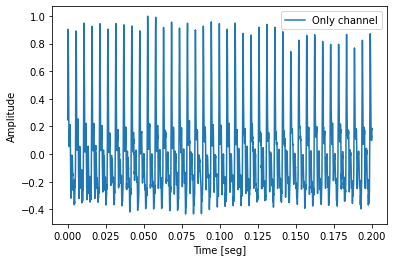

Duración:  0.20002083333333334 seg

A_037.wav


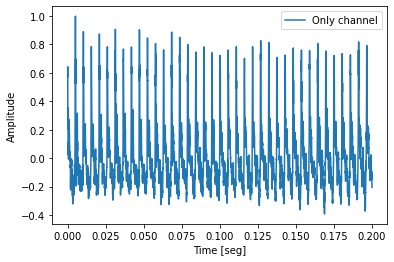

Duración:  0.20002083333333334 seg

A_077.wav


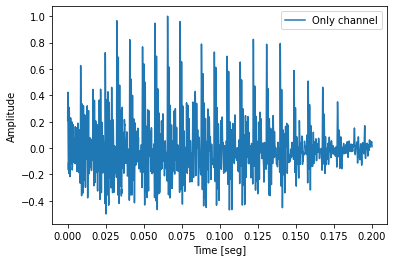

Duración:  0.20002083333333334 seg

A_073.wav


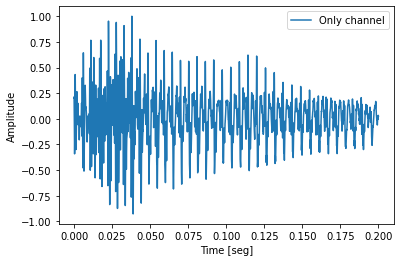

Duración:  0.20002083333333334 seg

A_023.wav


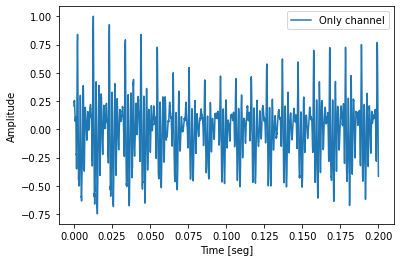

Duración:  0.20002083333333334 seg

A_043.wav


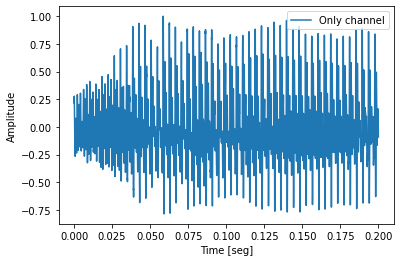

Duración:  0.20002083333333334 seg

A_076.wav


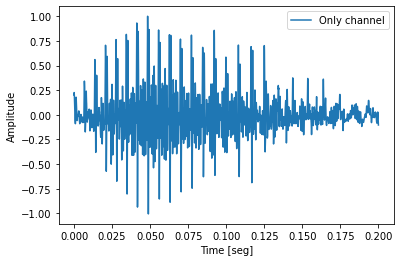

Duración:  0.20002083333333334 seg

A_062.wav


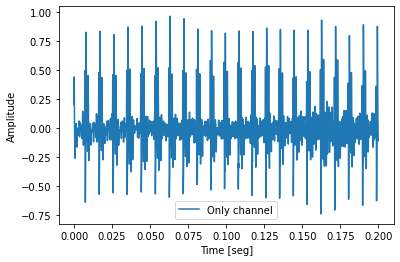

Duración:  0.20002083333333334 seg

A_056.wav


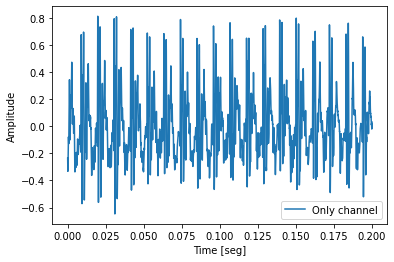

Duración:  0.20002083333333334 seg

A_054.wav


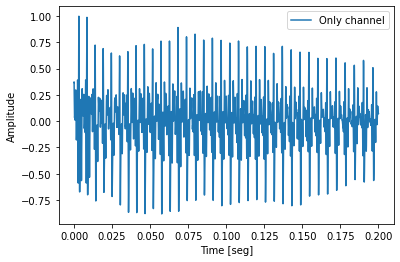

Duración:  0.20002083333333334 seg

A_066.wav


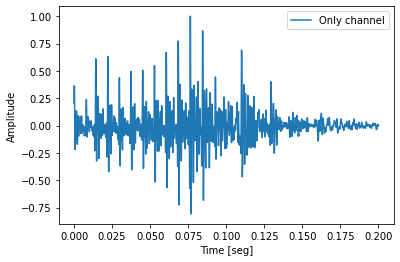

Duración:  0.20002083333333334 seg

A_004.wav


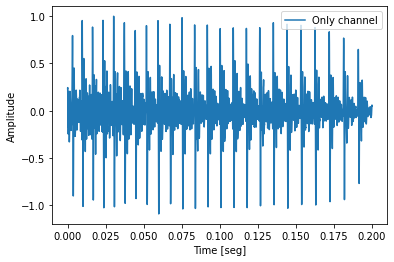

Duración:  0.20002083333333334 seg

A_010.wav


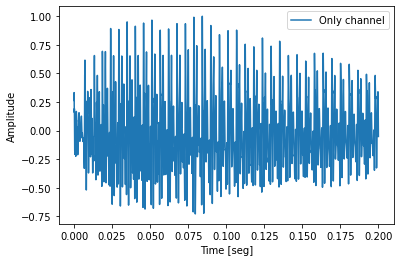

Duración:  0.20002083333333334 seg

A_014.wav


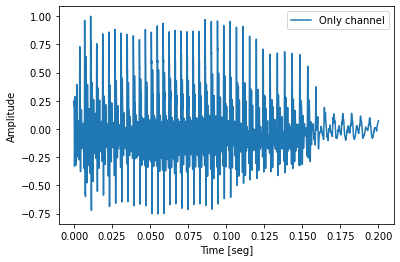

Duración:  0.20002083333333334 seg



In [18]:
for a in A_records:
    try:
      print(a)
      samplerate, data = wavfile.read(path_A+'/'+a)
      filter_data = remove_silences_signal(samplerate, data)
      norm_data = normalize_signal(samplerate, filter_data)
      cut_data = cut_signal(samplerate, norm_data)
      visualize_wave(samplerate, cut_data)
    except Exception as exc:
        print(exc)
        traceback.print_exc()
    print()

Una vez tenemos la señal normalizada, lo que hacemos es obtener el **PSD** de la señal para un rango de frecuencias suficientemente grande (0, 5000) para distinguir cada una de las **vocales en sus respectivos rangos**.

In [63]:
def get_psd(samplerate, rata):
    fs = samplerate
    f, Pxx_den = welch(data, fs, nperseg=1024)
    return (f, Pxx_den)

def visualize_psd(samplerate, data):
    fs = samplerate
    f, Pxx_den = welch(data, fs, nperseg=1024)
    #print(f)
    #print(Pxx_den)
    plt.plot(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.xlim([0, 5000])
    plt.show()

U_97.wav


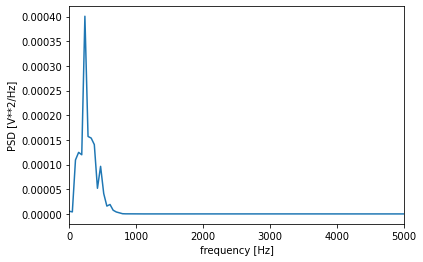


U_045.wav


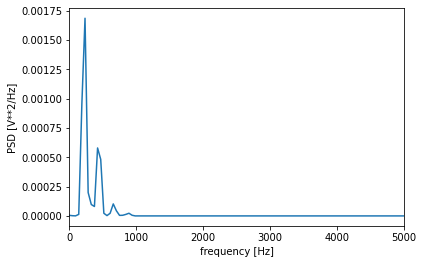


U_004.wav


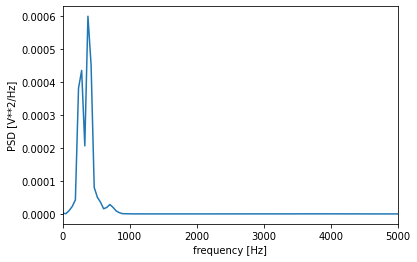


U_039.wav


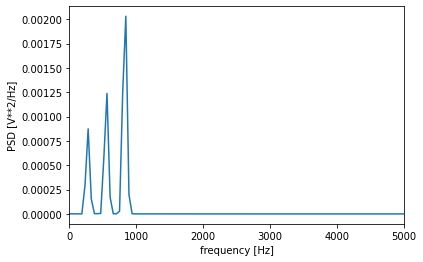


U_73.wav


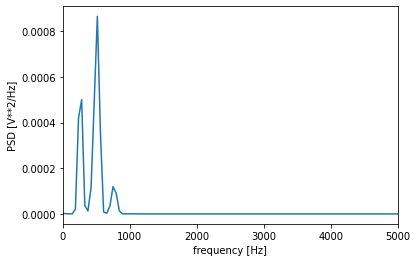


U_035.wav


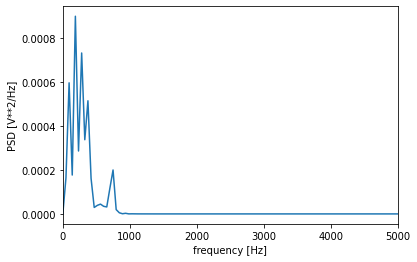


U_065.wav


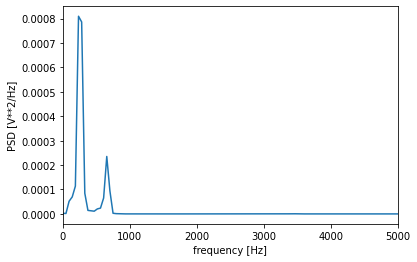


U_74.wav


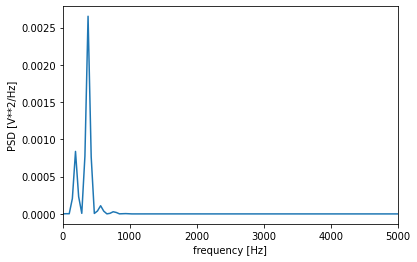


U_061.wav


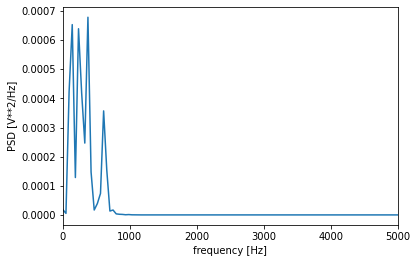


U_050.wav


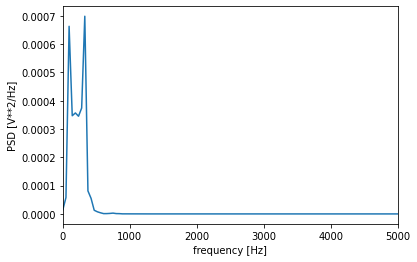


U_98.wav


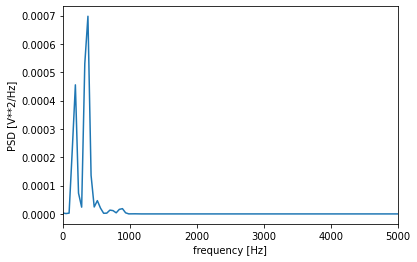


U_055.wav


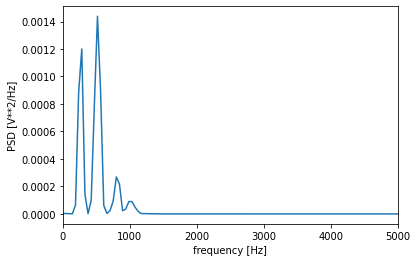


U_002.wav


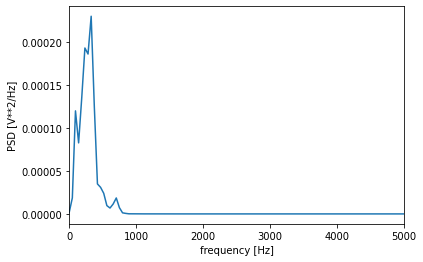


U_037.wav


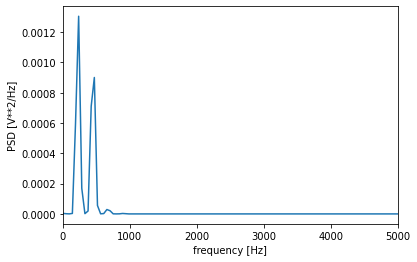


U_94.wav


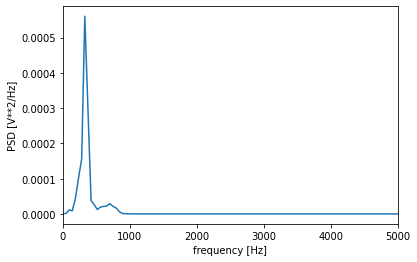


U_022.wav


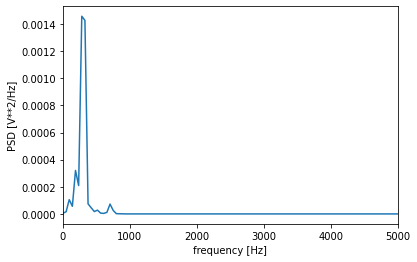


U_043.wav


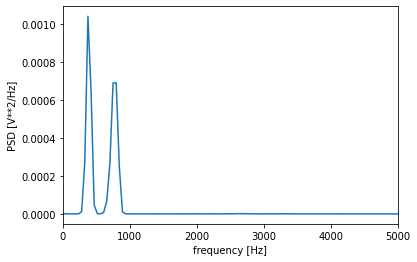


U_044.wav


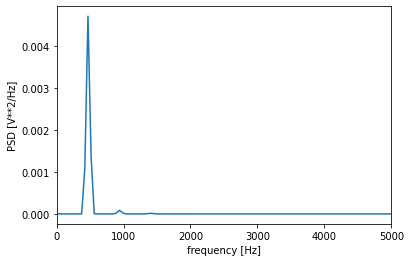


U_034.wav


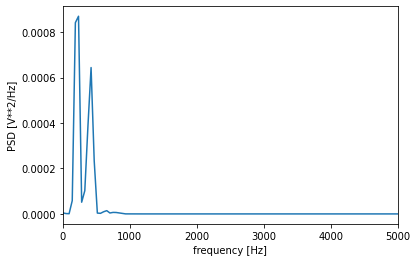


U_100.wav


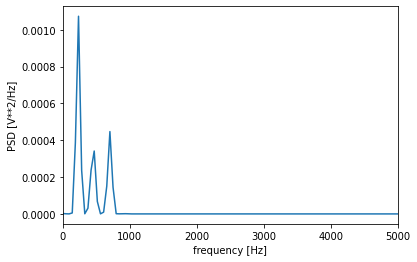


U_80.wav


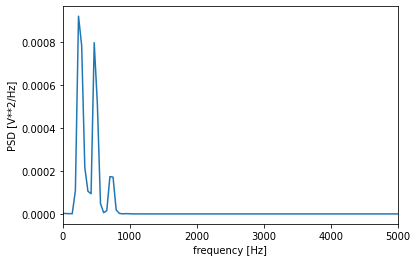


U_060.wav


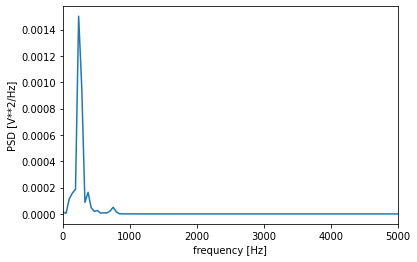


U_048.wav


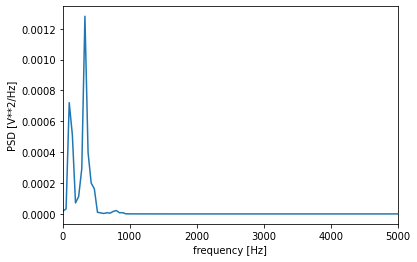


U_046.wav


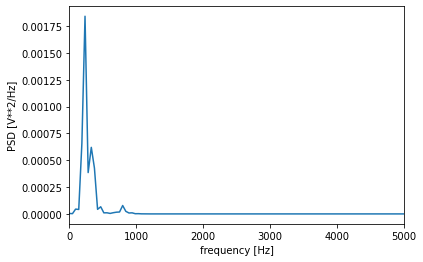


U_96.wav


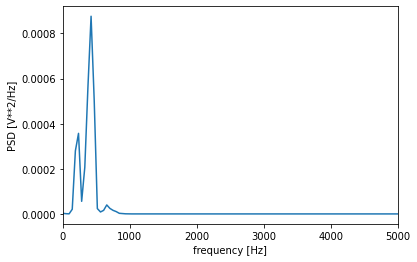


U_008.wav


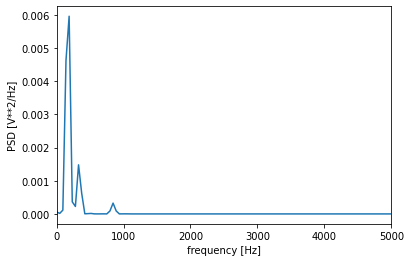


U_77.wav


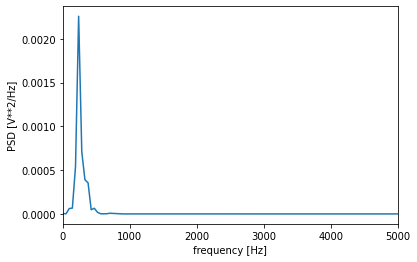


U_053.wav


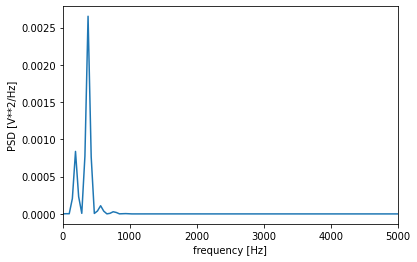


U_023.wav


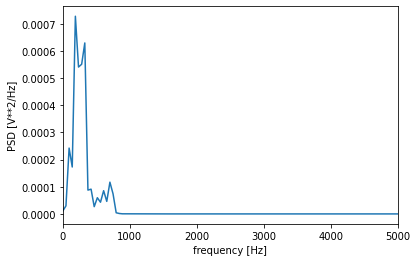


U_042.wav


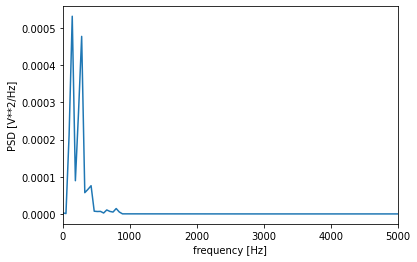


U_027.wav


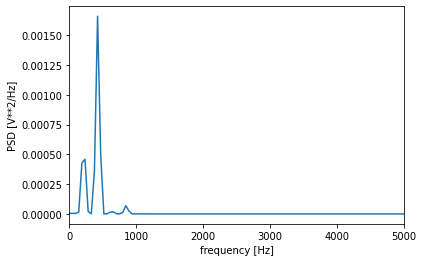


U_056.wav


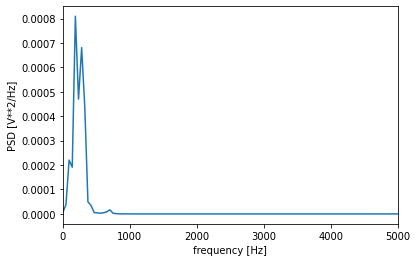


U_036.wav


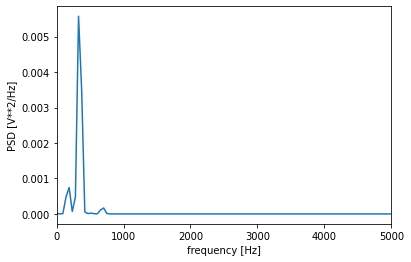


U_026.wav


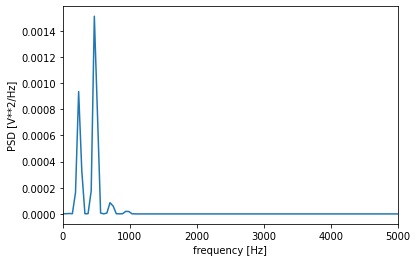


U_049.wav


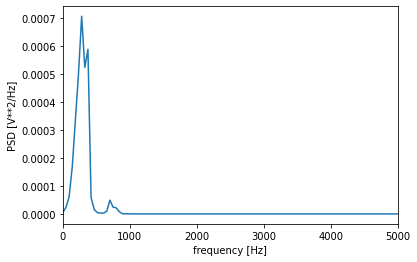


U_78.wav
list index out of range

U_024.wav


Traceback (most recent call last):
  File "<ipython-input-65-6ef6abeeeb05>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


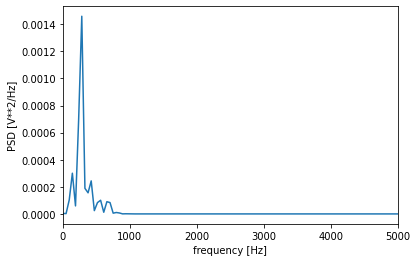


U_068.wav


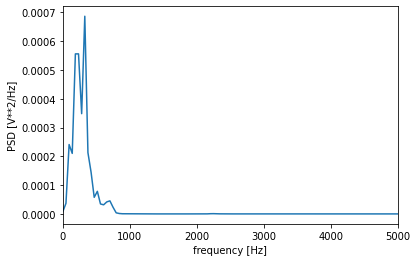


U_013.wav


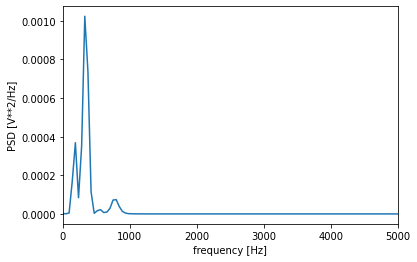


U_033.wav


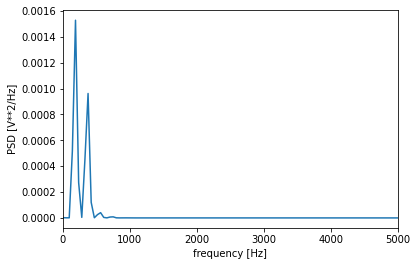


U_010.wav


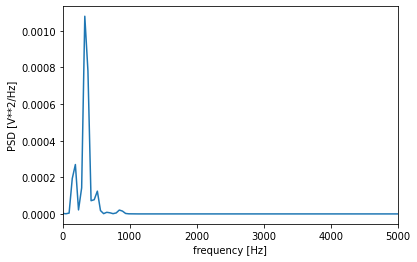


U_95.wav


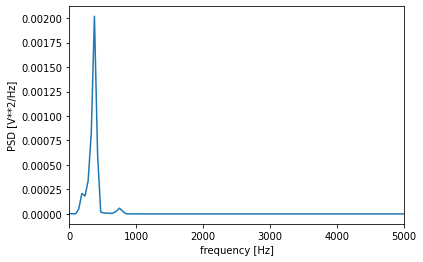


U_047.wav


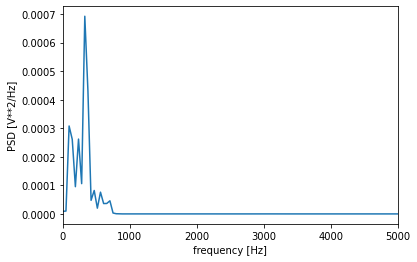


U_057.wav


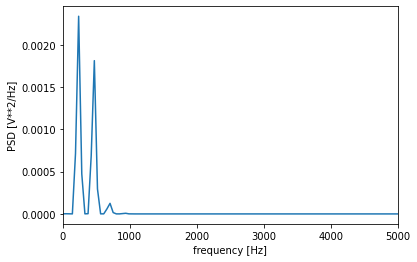


U_83.wav


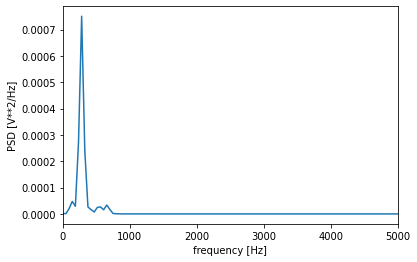


U_038.wav


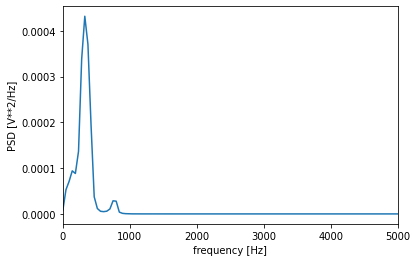


U_90.wav
list index out of range

U_92.wav


Traceback (most recent call last):
  File "<ipython-input-65-6ef6abeeeb05>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


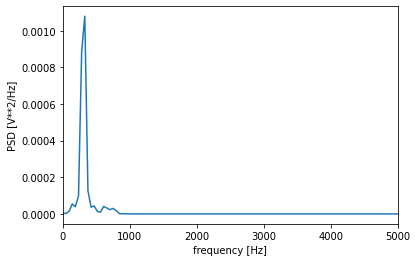


U_019.wav


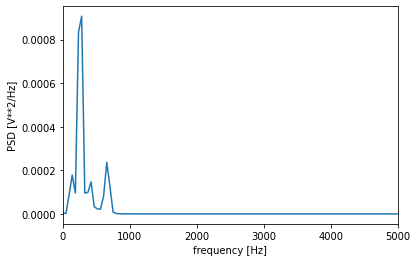


U_041.wav


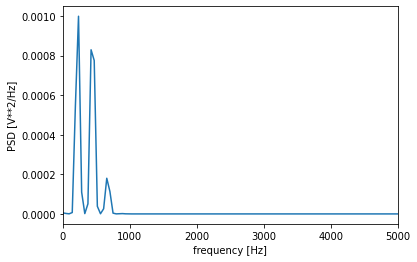


U_001.wav
list index out of range

U_76.wav


Traceback (most recent call last):
  File "<ipython-input-65-6ef6abeeeb05>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


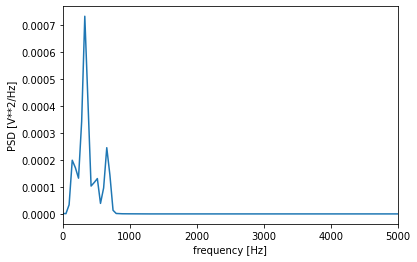


U_020.wav


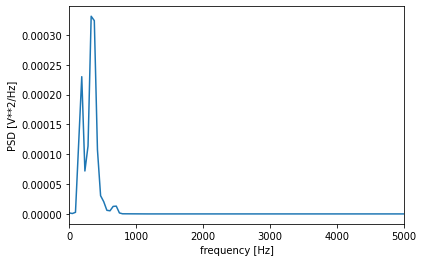


U_79.wav


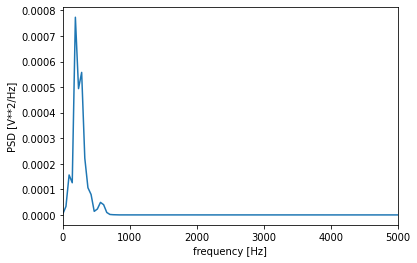


U_052.wav


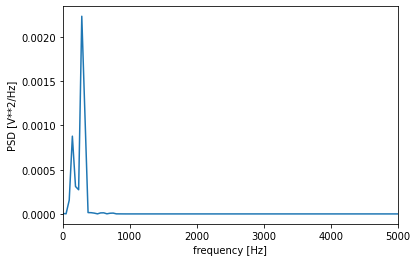


U_86.wav


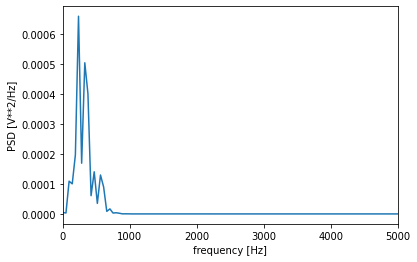


U_030.wav


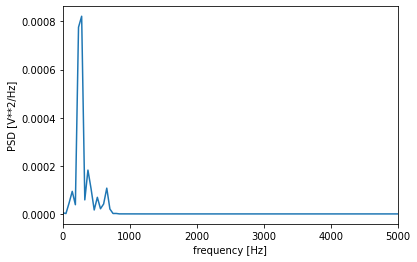


U_89.wav


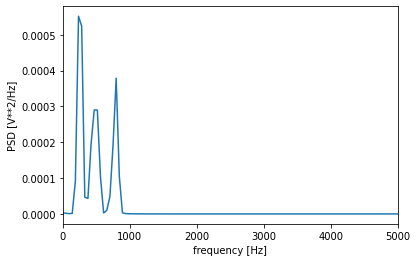


U_069.wav


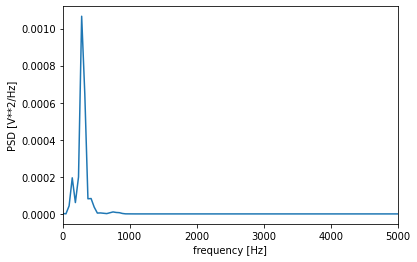


U_017.wav


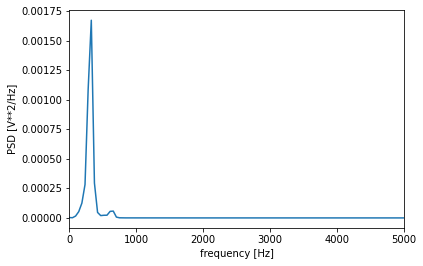


U_81.wav


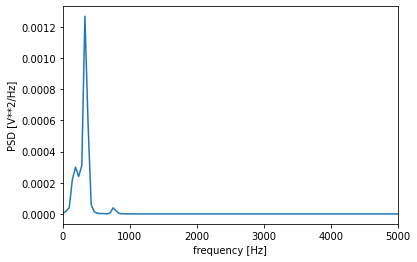


U_016.wav


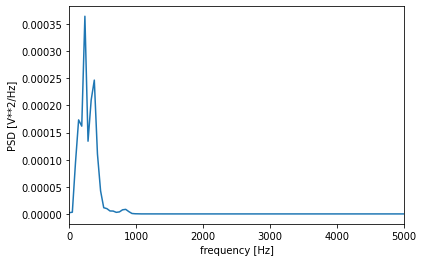


U_067.wav


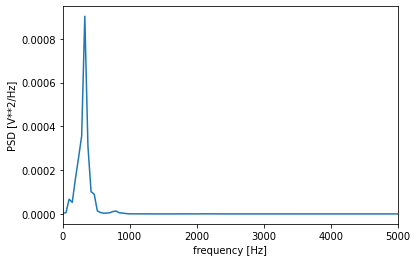


U_071.wav


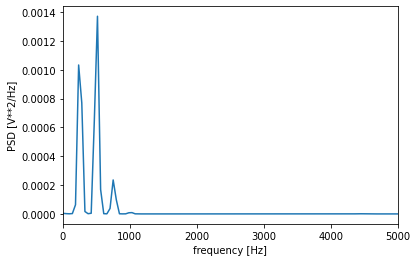


U_025.wav


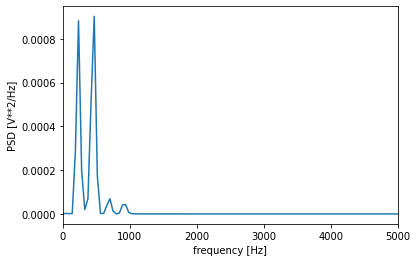


U_009.wav


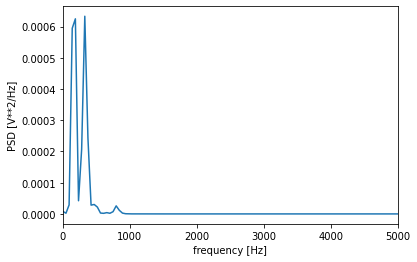


U_015.wav


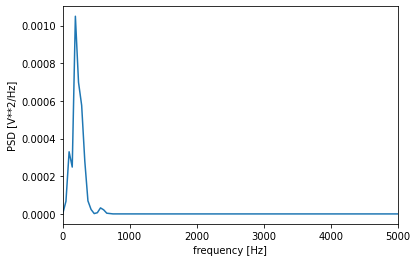


U_032.wav


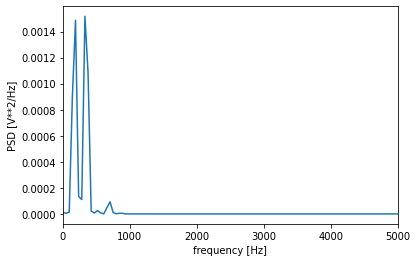


U_99.wav


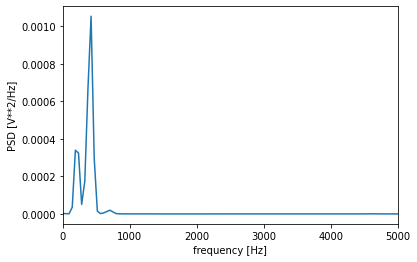


U_91.wav


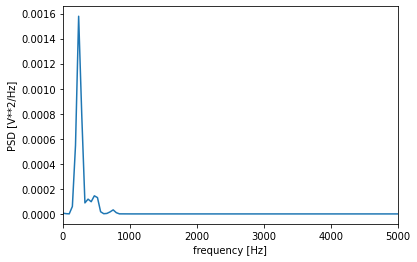


U_87.wav


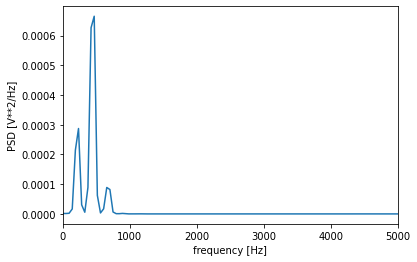


U_82.wav


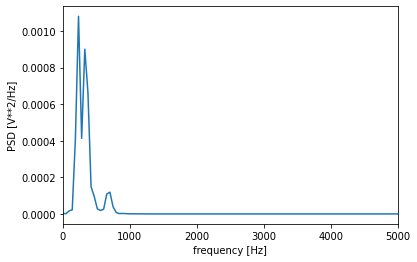


U_88.wav


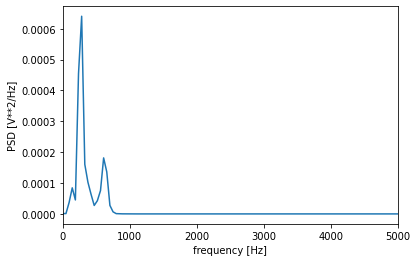


U_054.wav


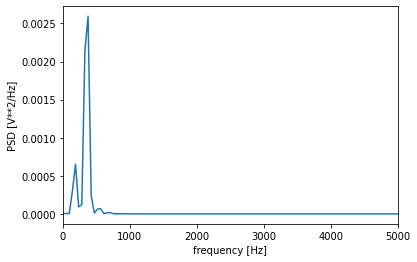


U_064.wav


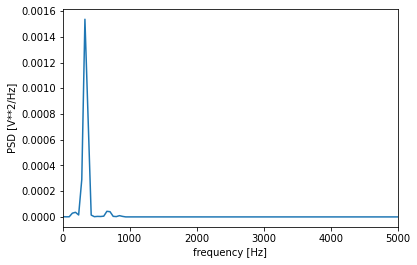


U_021.wav


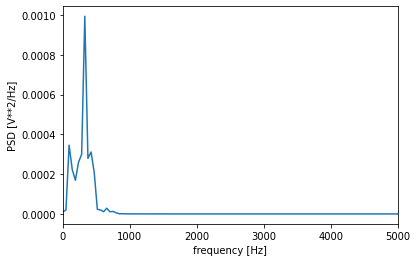


U_84.wav


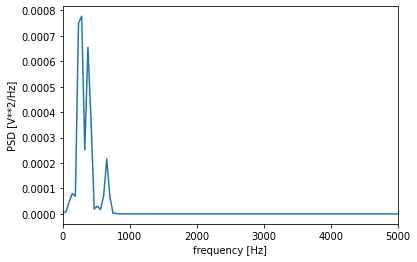


U_059.wav


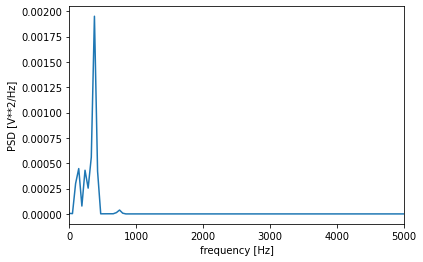


U_018.wav


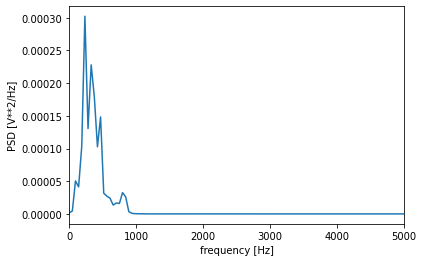


U_005.wav


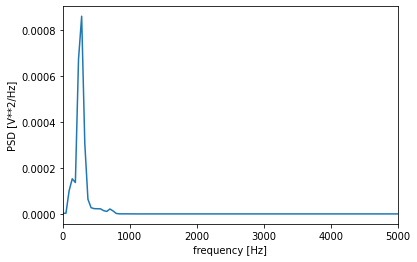


U_006.wav


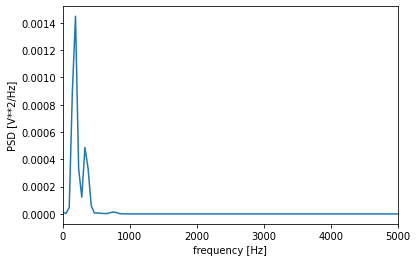


U_062.wav


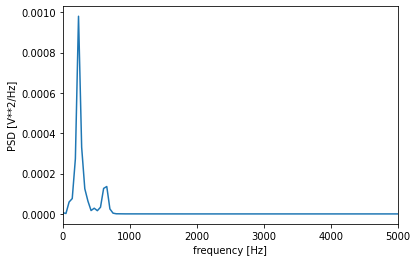


U_063.wav


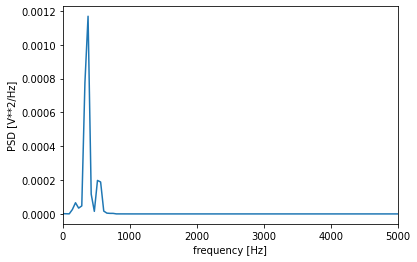


U_011.wav


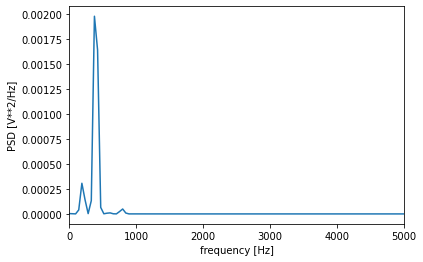


U_031.wav


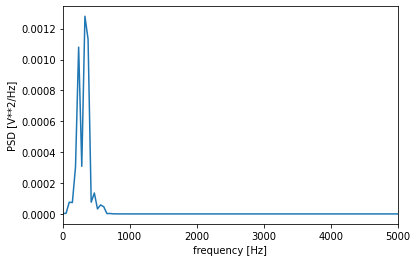


U_75.wav


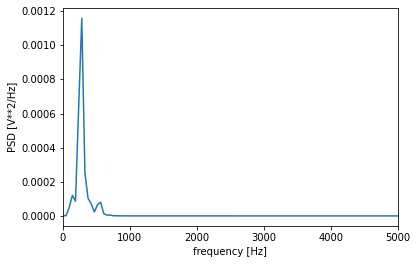


U_066.wav


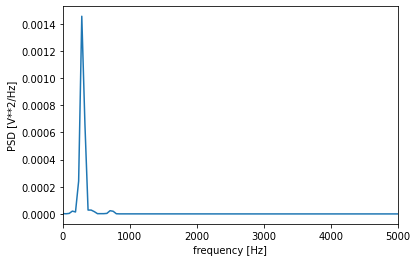


U_029.wav


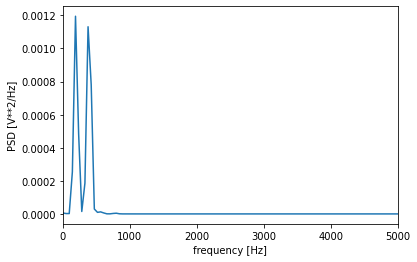


U_85.wav


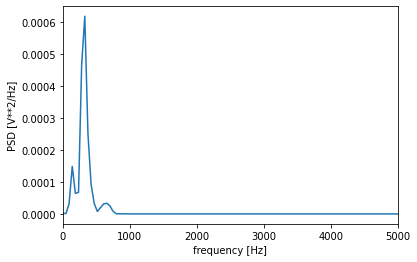


U_051.wav


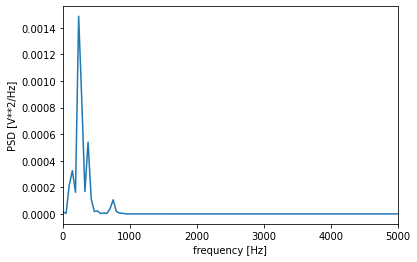


U_007.wav


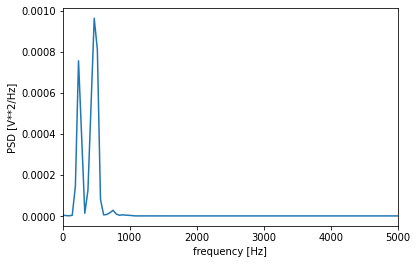


U_070.wav


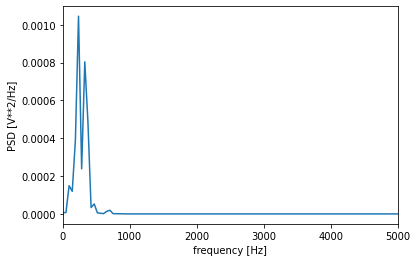


U_003.wav


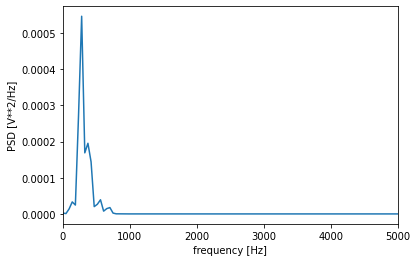


U_012.wav


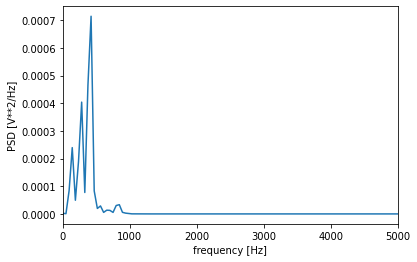


U_058.wav


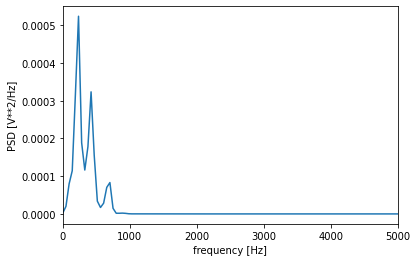


U_028.wav


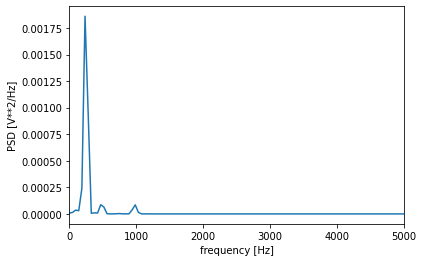


U_014.wav


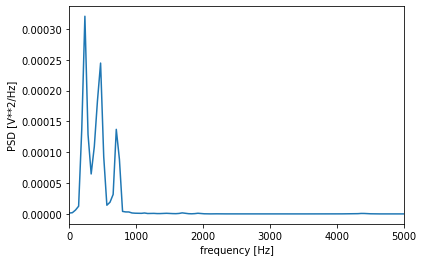


U_93.wav


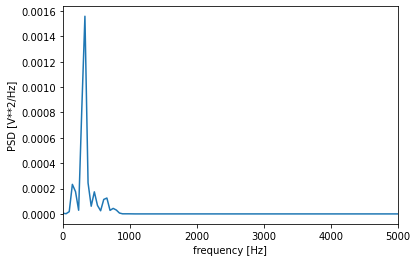


U_72.wav
list index out of range

U_040.wav


Traceback (most recent call last):
  File "<ipython-input-65-6ef6abeeeb05>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


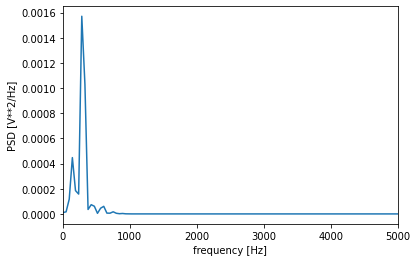

In [65]:
for u in U_records:
    try:
      print(u)
      samplerate, data = wavfile.read(path_U+'/'+u)
      filter_data = remove_silences_signal(samplerate, data)
      norm_data = normalize_signal(samplerate, filter_data)
      cut_data = cut_signal(samplerate, norm_data)
      visualize_psd(samplerate, cut_data)
      #print(get_psd(samplerate, norm_data)[0].shape)
    except Exception as exc:
        print(exc)
        traceback.print_exc()
    print()

**Integral bajo la curva de densidad**: la idea es utilizar el area bajo la curva de la densidad para caracterizar cada vocal. Vimos que algunas vocales concentran una mayor densidad en rangos de frecuencia muy especificos, que varían de una a otra. Esto hace que un vector de **integrales definidas** entre dos frecuencias, que especifican un rango de frecuencia, sean una variable predictora significativa. De hecho, en la siguientes sección verificamos que nuestra intuición sea correcta, implementando una red neural con el **vector de integrales** como entrada.

Para eso, lo primero que hacemos es definir los límites de integración, es decir, los rangos de frecuencias para los cuales calcularemos el area bajo la curva de su densidad. Para esto, la entrada son las frecuencias límites de los rangos, y se divide el intervalo de frecuencia en los **subintervalos** definidos por los límites. Luego utilizaremos estos **subintervalos** para calcular las integrales definidas.

In [84]:
def divide_subintervals(density_vec, frecuency_vec, frecuencies):
    sub_intervals = []
    for i in range(len(frecuencies)-1):
        frec_inf = frecuencies[i]
        frec_sup = frecuencies[i+1]
        sub_int = []
        for j in range(len(frecuency_vec)):
            if frec_inf <= frecuency_vec[j] and frecuency_vec[j] <= frec_sup:
                sub_int.append(density_vec[j])
        sub_intervals.append(sub_int)
    #print(sub_intervals)
    return sub_intervals

In [76]:
samplerate, data = wavfile.read(path_U+'/'+U_records[1])
filter_data = remove_silences_signal(samplerate, data)
norm_data = normalize_signal(samplerate, filter_data)
cut_data = cut_signal(samplerate, norm_data)
frecs, dens = get_psd(samplerate, norm_data)
sub_intervals = divide_subintervals(dens, frecs, [0, 500, 5000, 25000])

inter = []
for sub_int in sub_intervals:
    print(len(sub_int))
    inter += sub_int

print(all(inter == dens))

[[3628423390560.507, 1669881595103.4973, 932074890068.0455, 14649124543543.145, 482499187453294.9, 751867670216634.1, 113938659833229.9, 44380655344334.62, 59432992437820.87, 276133848127747.97, 198773149756325.1], [11381470585510.326, 4894084153804.171, 17535083805582.037, 44109350131577.27, 19443473426338.33, 4046556511356.9546, 6404837653978.191, 6868878591820.732, 9132381758724.068, 2289043721333.976, 76563603972.1175, 69960726958.29501, 82959694895.89719, 93340749933.6631, 19083590846.724678, 8483110811.728536, 7417750245.73424, 11798894538.272009, 14919980169.239782, 6056614740.854333, 2987099026.5559554, 1767474883.2468083, 1983429870.3265448, 1481374375.2000318, 1571805711.7301514, 1425271272.70333, 844640805.3829215, 1377518682.8254795, 1323459552.136215, 775507603.7919525, 778030330.9670779, 1202496732.886687, 1742949381.9448135, 1081806189.3465588, 1038509850.5860181, 2017060241.930739, 3908696860.99696, 5127820709.144433, 6512752576.781043, 19357979767.893093, 34404456563.7

In [99]:
frec_limits = [0, 500, 5000, 25000]

In [100]:
integrales_definidas_U = []
for u in U_records:
    try:
      samplerate, data = wavfile.read(path_U+'/'+u)
      filter_data = remove_silences_signal(samplerate, data)
      norm_data = normalize_signal(samplerate, filter_data)
      cut_data = cut_signal(samplerate, norm_data)
      frecs, dens = get_psd(samplerate, norm_data)
      sub_intervals = divide_subintervals(dens, frecs, frec_limits)

      integrales_definidas = []
      inter = []
      for sub_int in sub_intervals:
          integrales_definidas.append(sum(sub_int))
      integrales_definidas_U.append(integrales_definidas)
    except Exception as exc:
        print(exc)
        traceback.print_exc()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 2, using nperseg = 2
  .format(nperseg, input_length))


list index out of range


Traceback (most recent call last):
  File "<ipython-input-100-2938ce55b41d>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


list index out of range


Traceback (most recent call last):
  File "<ipython-input-100-2938ce55b41d>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


list index out of range


Traceback (most recent call last):
  File "<ipython-input-100-2938ce55b41d>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


list index out of range


Traceback (most recent call last):
  File "<ipython-input-100-2938ce55b41d>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


In [101]:
integrales_definidas_O = []
for o in O_records:
    try:
      samplerate, data = wavfile.read(path_O+'/'+o)
      filter_data = remove_silences_signal(samplerate, data)
      norm_data = normalize_signal(samplerate, filter_data)
      cut_data = cut_signal(samplerate, norm_data)
      frecs, dens = get_psd(samplerate, norm_data)
      sub_intervals = divide_subintervals(dens, frecs, frec_limits)

      integrales_definidas = []
      inter = []
      for sub_int in sub_intervals:
          integrales_definidas.append(sum(sub_int))
      integrales_definidas_O.append(integrales_definidas)
    except Exception as exc:
        print(exc)
        traceback.print_exc()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 2, using nperseg = 2
  .format(nperseg, input_length))


list index out of range


Traceback (most recent call last):
  File "<ipython-input-101-28b6875e79e6>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


list index out of range


Traceback (most recent call last):
  File "<ipython-input-101-28b6875e79e6>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


In [102]:
integrales_definidas_I = []
for i in I_records:
    try:
      samplerate, data = wavfile.read(path_I+'/'+i)
      filter_data = remove_silences_signal(samplerate, data)
      norm_data = normalize_signal(samplerate, filter_data)
      cut_data = cut_signal(samplerate, norm_data)
      frecs, dens = get_psd(samplerate, norm_data)
      sub_intervals = divide_subintervals(dens, frecs, frec_limits)

      integrales_definidas = []
      inter = []
      for sub_int in sub_intervals:
          integrales_definidas.append(sum(sub_int))
      integrales_definidas_I.append(integrales_definidas)
    except Exception as exc:
        print(exc)
        traceback.print_exc()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 2, using nperseg = 2
  .format(nperseg, input_length))


list index out of range


Traceback (most recent call last):
  File "<ipython-input-102-4550acfc1c6e>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


list index out of range


Traceback (most recent call last):
  File "<ipython-input-102-4550acfc1c6e>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


In [103]:
integrales_definidas_E = []
for e in E_records:
    try:
      samplerate, data = wavfile.read(path_E+'/'+e)
      filter_data = remove_silences_signal(samplerate, data)
      norm_data = normalize_signal(samplerate, filter_data)
      cut_data = cut_signal(samplerate, norm_data)
      frecs, dens = get_psd(samplerate, norm_data)
      sub_intervals = divide_subintervals(dens, frecs, frec_limits)

      integrales_definidas = []
      inter = []
      for sub_int in sub_intervals:
          integrales_definidas.append(sum(sub_int))
      integrales_definidas_E.append(integrales_definidas)
    except Exception as exc:
        print(exc)
        traceback.print_exc()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 2, using nperseg = 2
  .format(nperseg, input_length))


list index out of range


Traceback (most recent call last):
  File "<ipython-input-103-9a35e2c73e38>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


In [104]:
integrales_definidas_A = []
for a in A_records:
    try:
      samplerate, data = wavfile.read(path_A+'/'+a)
      filter_data = remove_silences_signal(samplerate, data)
      norm_data = normalize_signal(samplerate, filter_data)
      cut_data = cut_signal(samplerate, norm_data)
      frecs, dens = get_psd(samplerate, norm_data)
      sub_intervals = divide_subintervals(dens, frecs, frec_limits)

      integrales_definidas = []
      inter = []
      for sub_int in sub_intervals:
          integrales_definidas.append(sum(sub_int))
      integrales_definidas_A.append(integrales_definidas)
    except Exception as exc:
        print(exc)
        traceback.print_exc()

list index out of range


Traceback (most recent call last):
  File "<ipython-input-104-f1a937140f86>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range


list index out of range


Traceback (most recent call last):
  File "<ipython-input-104-f1a937140f86>", line 7, in <module>
    cut_data = cut_signal(samplerate, norm_data)
  File "<ipython-input-15-d61a5ed33d61>", line 18, in cut_signal
    cut_data.append(data[i])
IndexError: list index out of range
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 2, using nperseg = 2
  .format(nperseg, input_length))


#**Red neuronal**

In [106]:
print((integrales_definidas_A))
print(len(integrales_definidas_E))
print(len(integrales_definidas_I))
print(len(integrales_definidas_O))
print(len(integrales_definidas_U))

[[63540416389095.42, 70250669334817.47, 36830585665.05166], [303475232111060.3, 1096386525195971.5, 26931672598.15261], [11906360442070.727, 28591639559334.266, 125820648892.96219], [2294619357260.945, 8881645311095.268, 4103299371.0387588], [75185976940479.48, 95276970397121.23, 374202288.5962577], [84786209509832.02, 123838736215699.89, 28567679295.716095], [1113.9500427246094, 4525.65236934647, 0.5627238441747977], [134051794285374.47, 560966823703160.4, 294551275488.0046], [86984514477011.55, 55985296127891.54, 55676831189.54338], [1301.6034789085388, 9462.668971478939, 13.443120402681075], [32110712698914.727, 1347804705168.0044, 1349089587.2377727], [26389236733459.54, 90545270278285.67, 5169966936.74593], [740493356456.3785, 2148009096484.433, 153522607.20949432], [210203122310906.06, 914650358978206.6, 924951687204.0186], [126469171472227.4, 160802976771350.62, 427990115387.5723], [74456094660566.52, 122731644142469.81, 90215204149.14572], [240890609807633.97, 689182000554594.6